In [1]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'C:\Users\bhuva\train_data.csv')
data

,report_date,temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction,atmospheric_pressure,visibility,precipitation,rain_days,...,duff_moisture_code,drought_code,build_up_index,initial_spread_index,fire_weather_index,daily_severity_rating,country,latitude,longitude,elevation
0,2013-10-31 12:00:00,5.7,-6.0,42.0,5.0,135,1009.13,39.3,0.00,1,...,6.5,309.9,12.3,0.7,0.5,0.0,United Kingdom,55.440834,-5.696944,12.8
1,2014-06-01 12:00:00,15.2,10.1,71.0,5.6,170,1018.60,30.1,0.00,5,...,31.9,172.7,43.7,2.8,7.6,1.0,Canada,48.460000,-123.300000,60.1
2,2017-10-01 12:00:00,5.9,4.2,88.0,27.9,321,1009.76,11.2,7.10,0,...,14.5,400.1,26.5,0.2,0.2,0.0,Canada,53.460000,-111.260000,656.0
3,2012-08-04 12:00:00,20.6,15.4,71.0,19.8,197,1015.41,21.1,0.00,1,...,6.1,242.0,11.4,1.6,1.2,0.0,Canada,53.350000,-110.420000,664.0
4,2017-05-08 12:00:00,11.0,6.0,71.5,13.0,260,1005.90,16.1,0.25,0,...,4.4,12.2,4.6,1.4,0.6,0.0,United States,43.645645,-70.308620,23.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183935,2018-08-24 12:00:00,11.5,4.5,62.0,12.6,292,1015.70,17.9,0.20,0,...,1.9,138.9,3.7,1.8,0.7,0.0,Canada,51.870000,-63.280000,588.9
1183936,2010-06-02 12:00:00,17.9,5.9,45.5,7.4,220,1012.10,24.0,0.00,2,...,5.8,42.5,8.7,3.1,2.9,0.2,Canada,49.910000,-99.951940,409.4
1183937,2016-08-18 12:00:00,18.4,9.0,54.5,14.8,300,1017.10,19.8,0.00,1,...,20.5,130.0,29.4,5.1,10.1,1.6,Canada,51.770000,-104.200000,560.1
1183938,2016-10-21 12:00:00,11.0,-1.0,43.6,29.6,260,1015.10,14.5,0.00,4,...,8.6,253.4,15.9,11.8,14.4,3.0,Canada,49.520557,-113.997220,1189.6


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1183940 entries, 0 to 1183939
Data columns (total 22 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   report_date              1183940 non-null  object 
 1   temperature              1183940 non-null  float64
 2   dew_point_temperature    1183940 non-null  float64
 3   relative_humidity        1183940 non-null  float64
 4   wind_speed               1183940 non-null  float64
 5   wind_direction           1183940 non-null  int64  
 6   atmospheric_pressure     1183940 non-null  float64
 7   visibility               1183940 non-null  float64
 8   precipitation            1183940 non-null  float64
 9   rain_days                1183940 non-null  int64  
 10  snow_on_ground           1183940 non-null  float64
 11  fine_fuel_moisture_code  1183940 non-null  float64
 12  duff_moisture_code       1183940 non-null  float64
 13  drought_code             1183940 non-null 

In [4]:
data.drop(['report_date'], axis =1 , inplace = True)

import numpy as np

def remove_outliers(df, features):
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Option 1: Remove outliers
        df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
        # Option 2: Cap outliers (replace above/ below bounds with bounds)
        # df[feature] = np.where(df[feature] < lower_bound, lower_bound, df[feature])
        # df[feature] = np.where(df[feature] > upper_bound, upper_bound, df[feature])
    return df

#numerical_features = ['Temperature', 'Relative Humidity', 'Wind Speed', 'Rain', 'FFMC', 'DMC', 'ISI']
#train_data_cleaned = remove_outliers(train_data, numerical_features)


def trim_extremes(df, column, lower_percent=0.1, upper_percent=0.1):
    lower_cutoff = df[column].quantile(lower_percent / 100)
    upper_cutoff = df[column].quantile(1 - upper_percent / 100)
    return df[(df[column] >= lower_cutoff) & (df[column] <= upper_cutoff)]

# Usage for a list of numerical features
numerical_features = ['Temperature', 'Relative Humidity', 'Wind Speed', 'Rain', 'FFMC', 'DMC', 'ISI']

for feature in numerical_features:
    train_data = trim_extremes(train_data, feature, 0.1, 0.1)


In [7]:
import numpy as np

def remove_outliers(df, features):
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df

In [8]:
numerical_features = [
    'temperature', 'dew_point_temperature', 'relative_humidity',
    'wind_speed', 'atmospheric_pressure', 'visibility',
    'precipitation', 'rain_days', 'snow_on_ground',
    'fine_fuel_moisture_code', 'duff_moisture_code', 'drought_code',
    'build_up_index', 'initial_spread_index', 'fire_weather_index'
]

train_data_cleaned = remove_outliers(data, numerical_features)
train_data_cleaned

,temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction,atmospheric_pressure,visibility,precipitation,rain_days,snow_on_ground,...,duff_moisture_code,drought_code,build_up_index,initial_spread_index,fire_weather_index,daily_severity_rating,country,latitude,longitude,elevation
1,15.2,10.1,71.0,5.6,170,1018.60,30.1,0.00,5,0.0,...,31.9,172.7,43.7,2.8,7.6,1.0,Canada,48.460000,-123.300000,60.1
3,20.6,15.4,71.0,19.8,197,1015.41,21.1,0.00,1,0.0,...,6.1,242.0,11.4,1.6,1.2,0.0,Canada,53.350000,-110.420000,664.0
4,11.0,6.0,71.5,13.0,260,1005.90,16.1,0.25,0,0.0,...,4.4,12.2,4.6,1.4,0.6,0.0,United States,43.645645,-70.308620,23.1
6,19.4,7.1,45.9,13.7,294,1015.99,28.9,0.80,0,0.0,...,14.6,143.9,23.3,4.2,7.4,0.9,Canada,45.830000,-72.540000,85.0
8,27.0,22.0,74.0,20.4,210,1018.70,16.1,3.56,0,0.0,...,13.3,46.4,15.5,1.9,2.4,0.1,United States,38.376015,-81.592896,288.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183934,30.6,21.1,55.0,11.1,230,1013.10,16.1,0.00,1,0.0,...,14.5,55.3,17.5,4.5,6.7,0.8,United States,30.691418,-88.242836,66.7
1183935,11.5,4.5,62.0,12.6,292,1015.70,17.9,0.20,0,0.0,...,1.9,138.9,3.7,1.8,0.7,0.0,Canada,51.870000,-63.280000,588.9
1183936,17.9,5.9,45.5,7.4,220,1012.10,24.0,0.00,2,0.0,...,5.8,42.5,8.7,3.1,2.9,0.2,Canada,49.910000,-99.951940,409.4
1183937,18.4,9.0,54.5,14.8,300,1017.10,19.8,0.00,1,0.0,...,20.5,130.0,29.4,5.1,10.1,1.6,Canada,51.770000,-104.200000,560.1


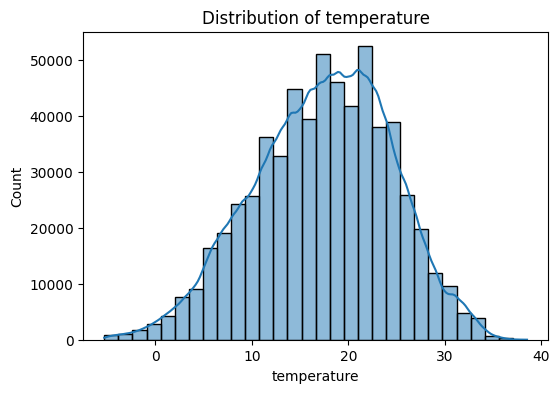

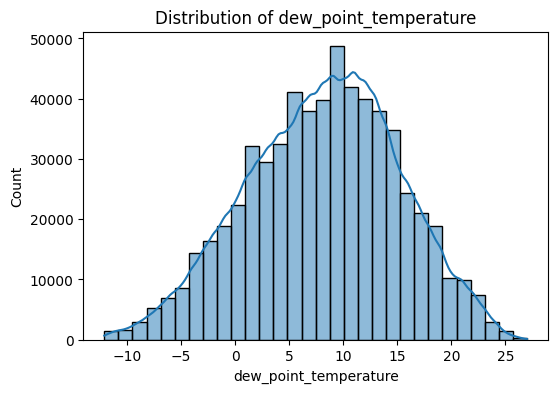

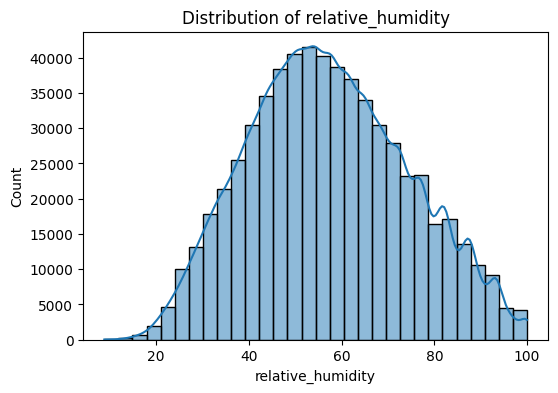

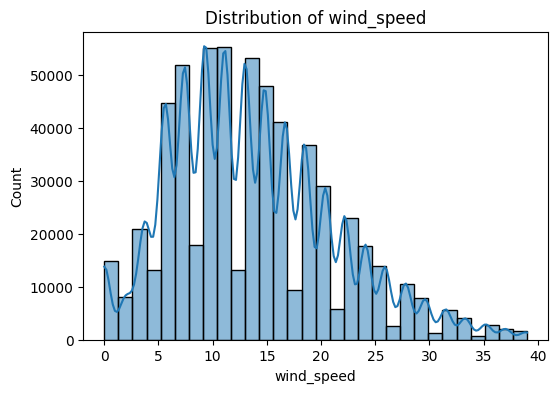

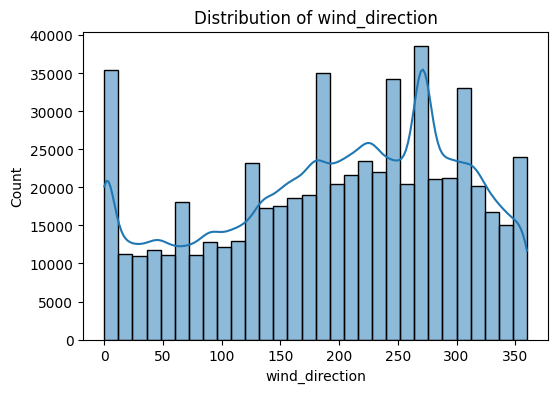

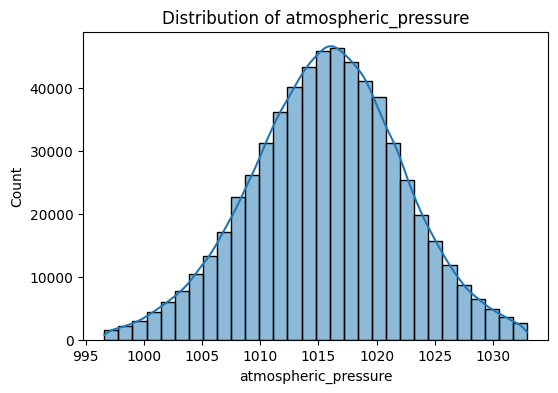

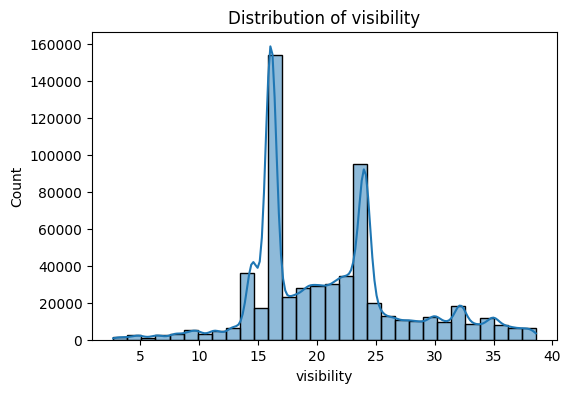

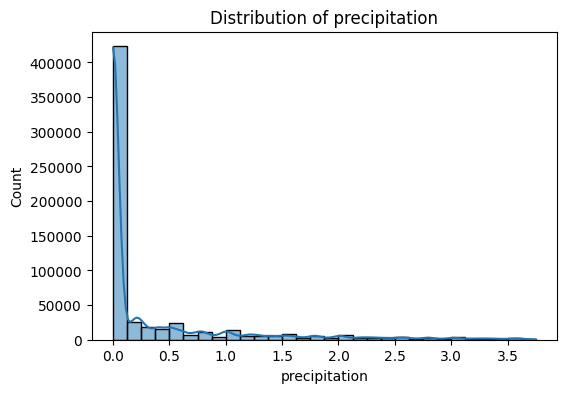

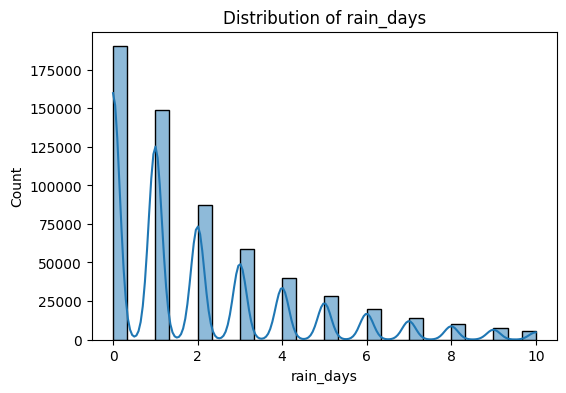

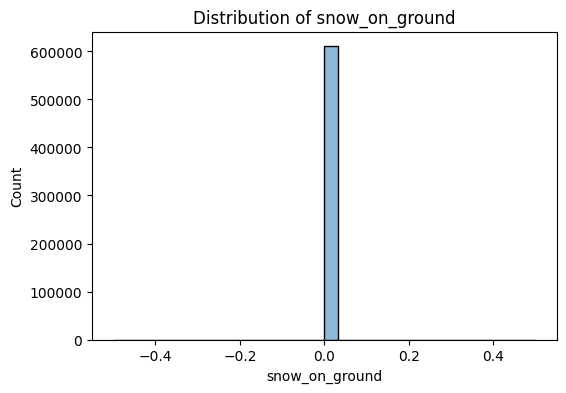

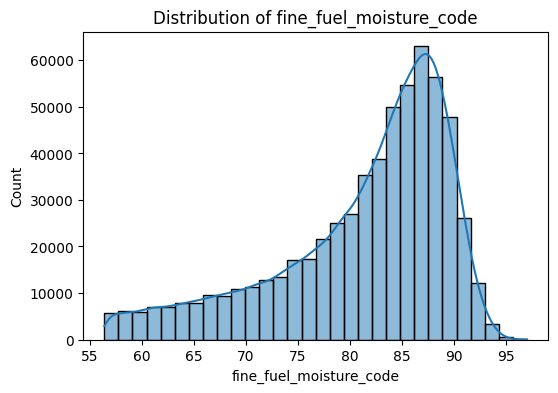

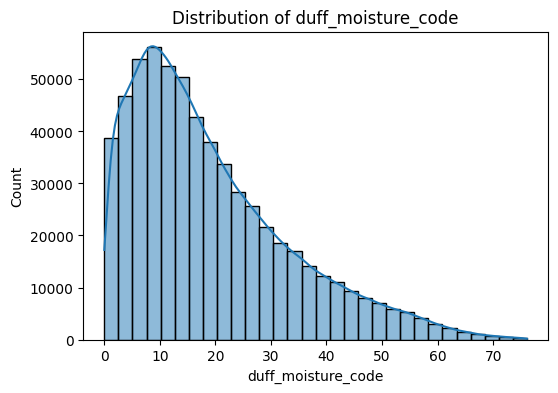

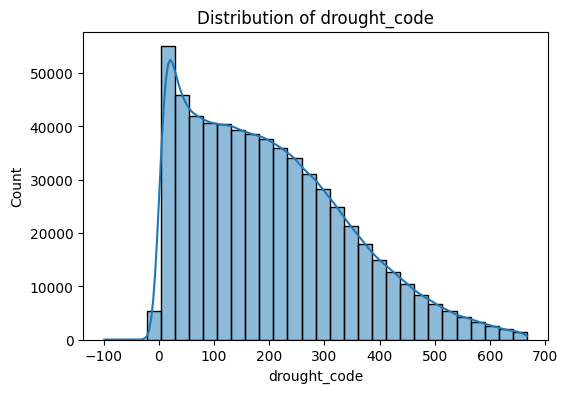

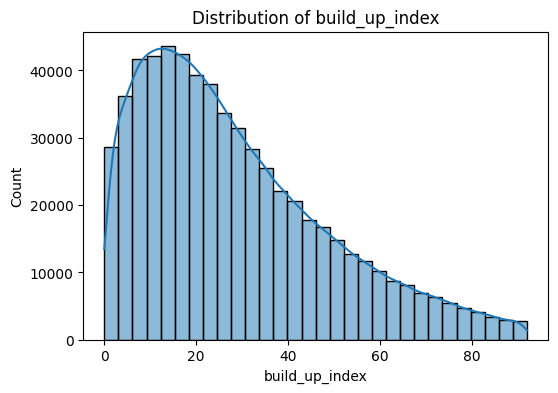

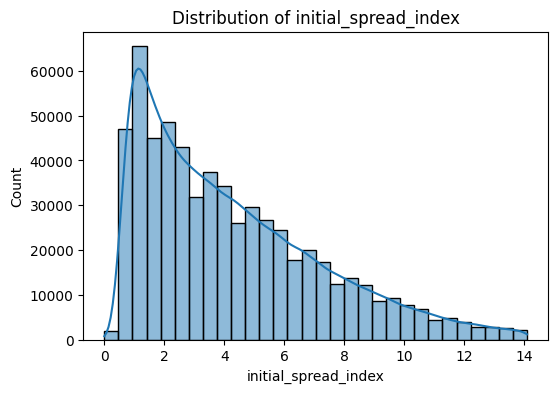

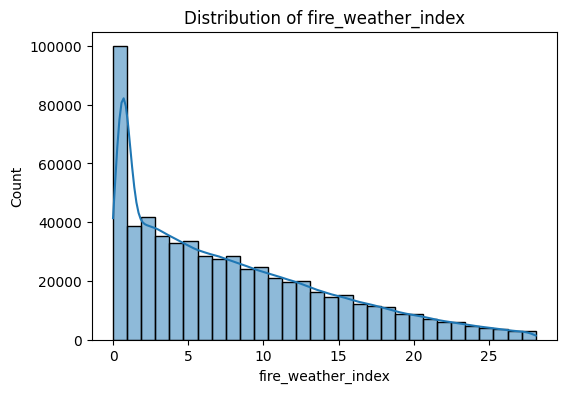

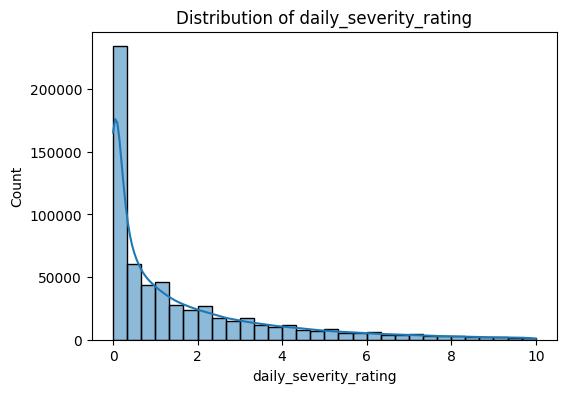

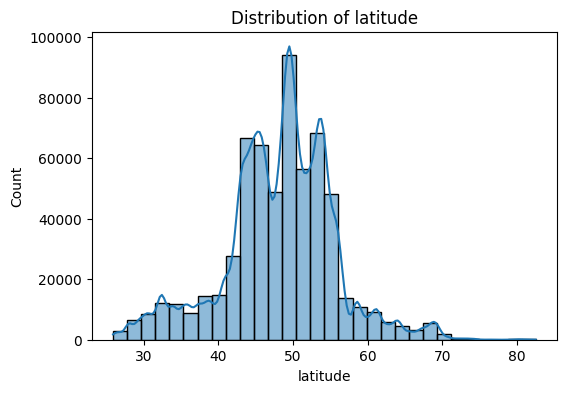

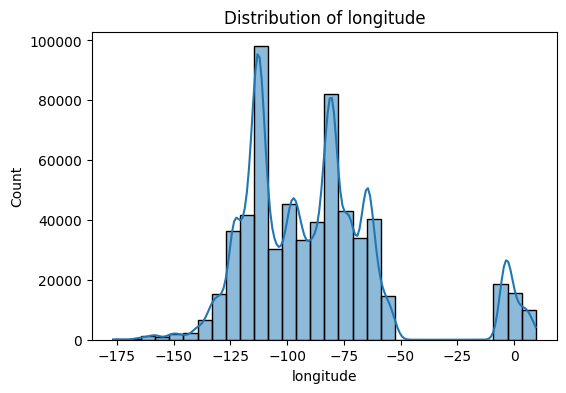

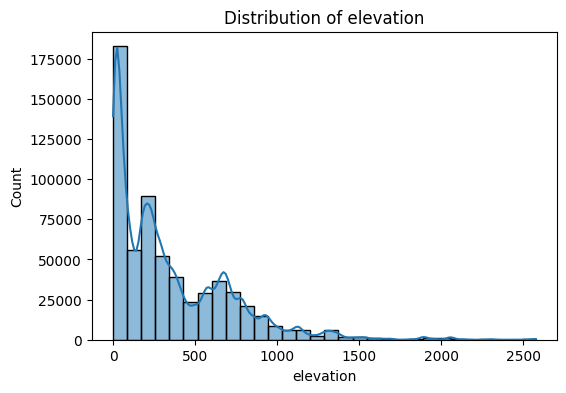

In [9]:
#Univariate Analysis

for col in train_data_cleaned.select_dtypes(include=['float64','int64']).columns:
    plt.figure(figsize=(6,4))
    sns.histplot(train_data_cleaned[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


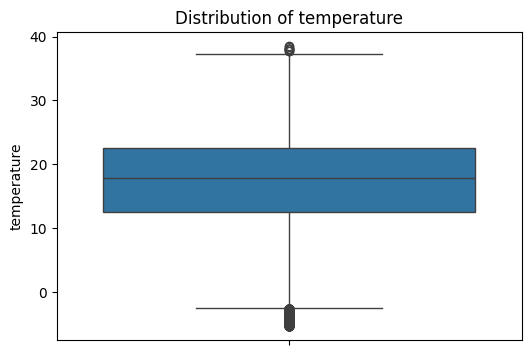

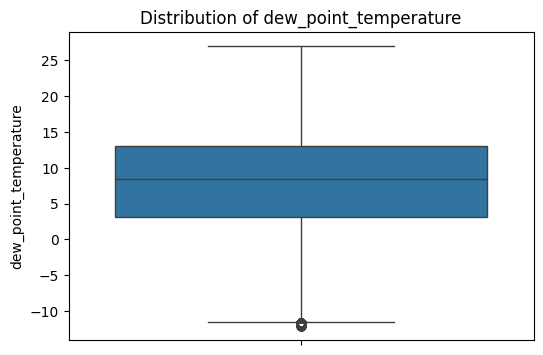

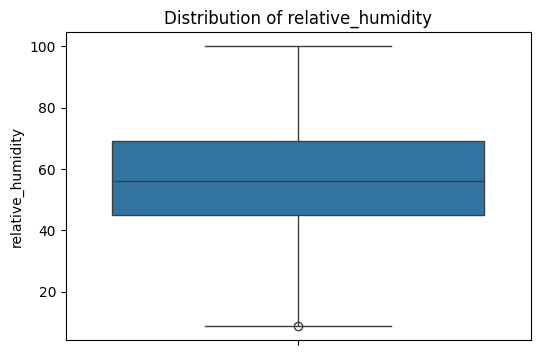

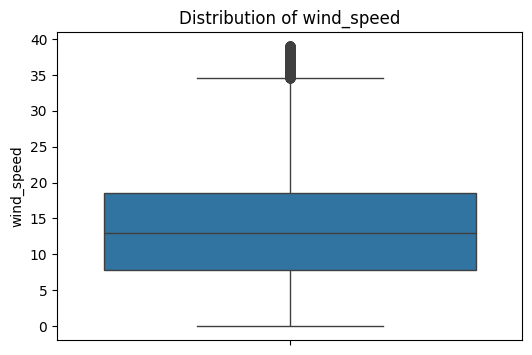

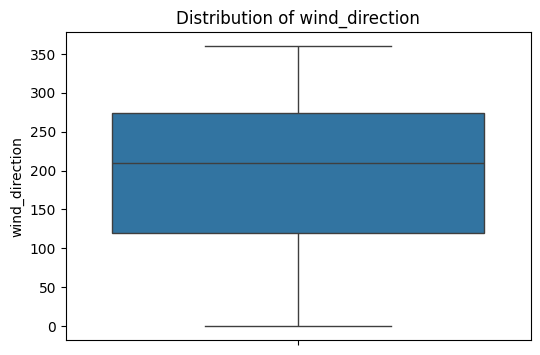

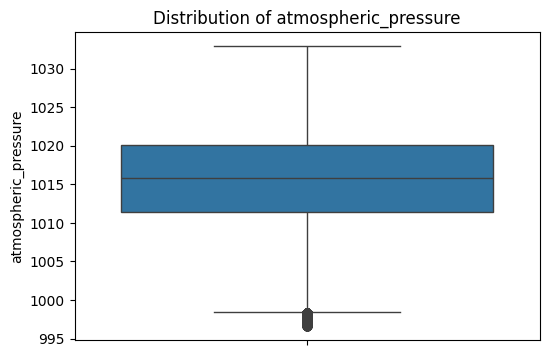

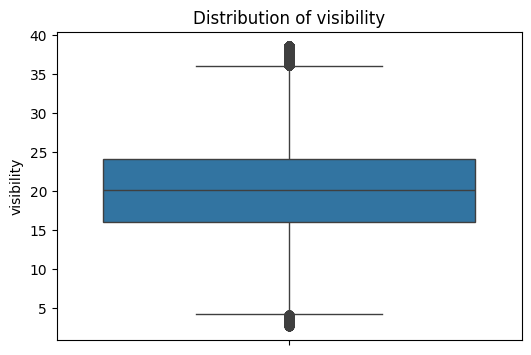

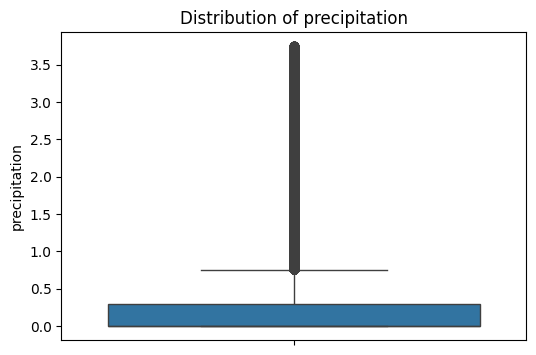

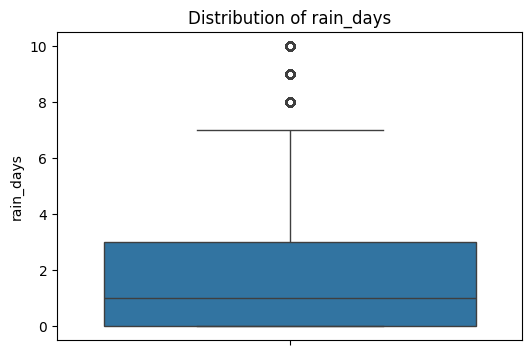

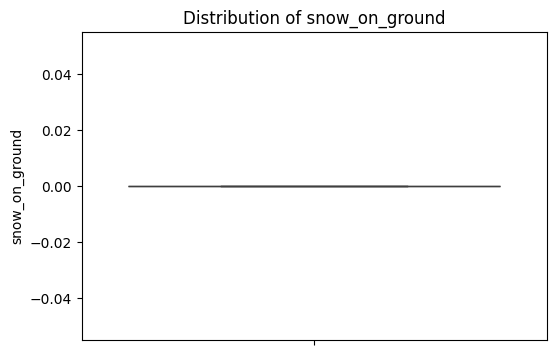

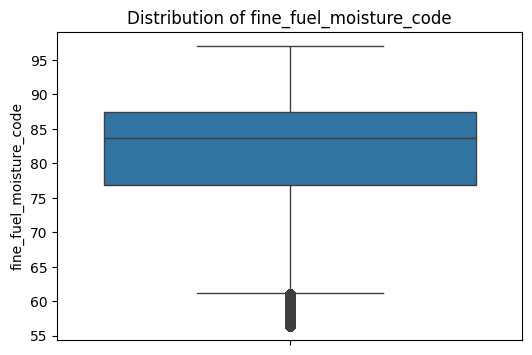

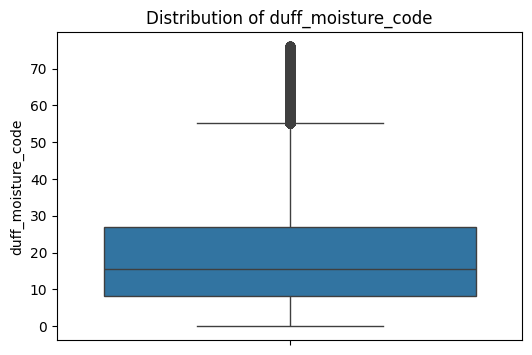

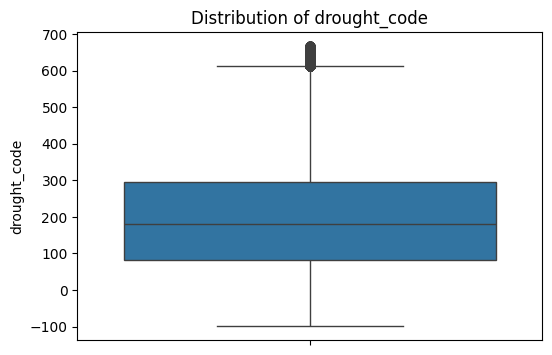

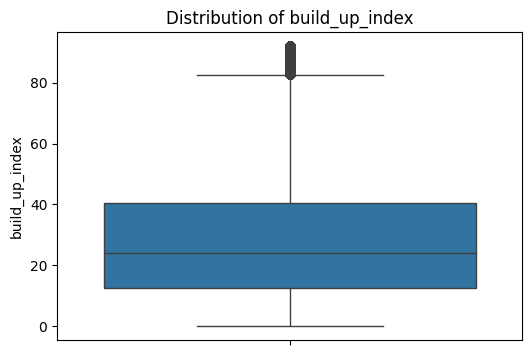

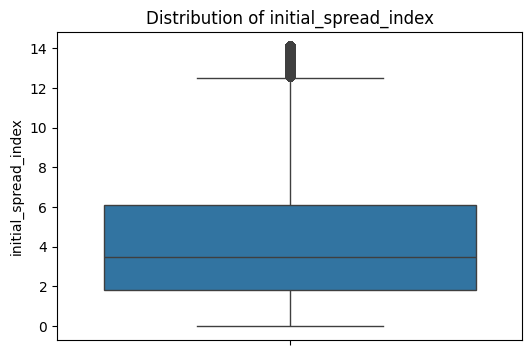

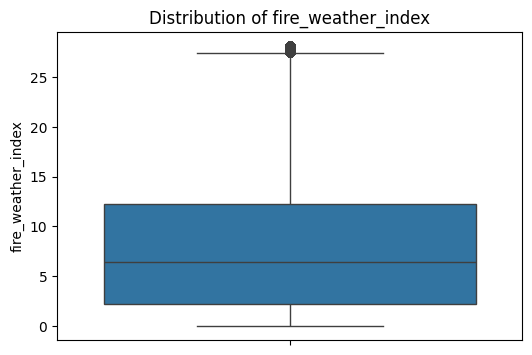

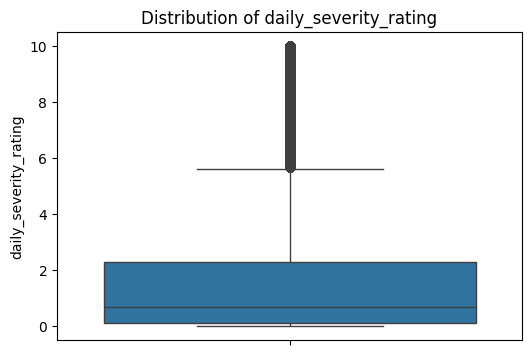

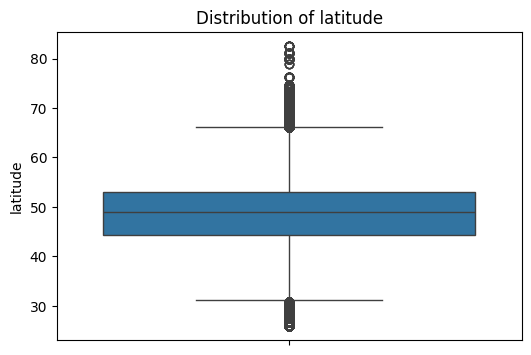

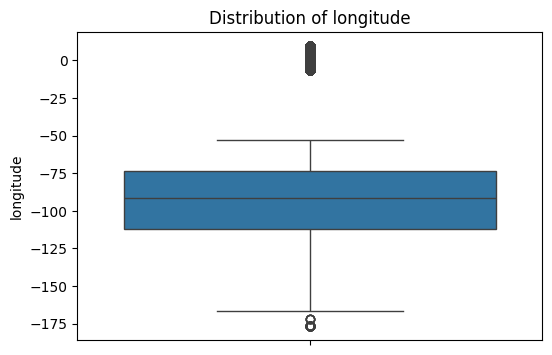

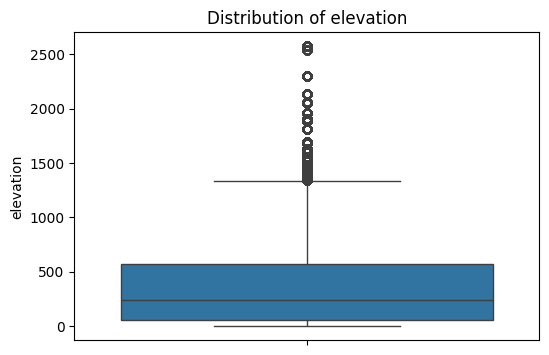

In [10]:
#Univariate Analysis

for col in train_data_cleaned.select_dtypes(include=['float64','int64']).columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(y = train_data_cleaned[col])
    plt.title(f'Distribution of {col}')
    plt.show()


In [11]:
data['drought_code'] = np.where(data['drought_code'] < 0, 0, data['drought_code'])

In [12]:
data

,temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction,atmospheric_pressure,visibility,precipitation,rain_days,snow_on_ground,...,duff_moisture_code,drought_code,build_up_index,initial_spread_index,fire_weather_index,daily_severity_rating,country,latitude,longitude,elevation
0,5.7,-6.0,42.0,5.0,135,1009.13,39.3,0.00,1,0.0,...,6.5,309.9,12.3,0.7,0.5,0.0,United Kingdom,55.440834,-5.696944,12.8
1,15.2,10.1,71.0,5.6,170,1018.60,30.1,0.00,5,0.0,...,31.9,172.7,43.7,2.8,7.6,1.0,Canada,48.460000,-123.300000,60.1
2,5.9,4.2,88.0,27.9,321,1009.76,11.2,7.10,0,0.0,...,14.5,400.1,26.5,0.2,0.2,0.0,Canada,53.460000,-111.260000,656.0
3,20.6,15.4,71.0,19.8,197,1015.41,21.1,0.00,1,0.0,...,6.1,242.0,11.4,1.6,1.2,0.0,Canada,53.350000,-110.420000,664.0
4,11.0,6.0,71.5,13.0,260,1005.90,16.1,0.25,0,0.0,...,4.4,12.2,4.6,1.4,0.6,0.0,United States,43.645645,-70.308620,23.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183935,11.5,4.5,62.0,12.6,292,1015.70,17.9,0.20,0,0.0,...,1.9,138.9,3.7,1.8,0.7,0.0,Canada,51.870000,-63.280000,588.9
1183936,17.9,5.9,45.5,7.4,220,1012.10,24.0,0.00,2,0.0,...,5.8,42.5,8.7,3.1,2.9,0.2,Canada,49.910000,-99.951940,409.4
1183937,18.4,9.0,54.5,14.8,300,1017.10,19.8,0.00,1,0.0,...,20.5,130.0,29.4,5.1,10.1,1.6,Canada,51.770000,-104.200000,560.1
1183938,11.0,-1.0,43.6,29.6,260,1015.10,14.5,0.00,4,0.0,...,8.6,253.4,15.9,11.8,14.4,3.0,Canada,49.520557,-113.997220,1189.6


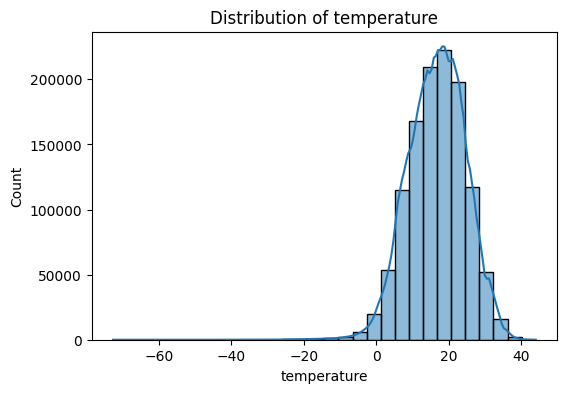

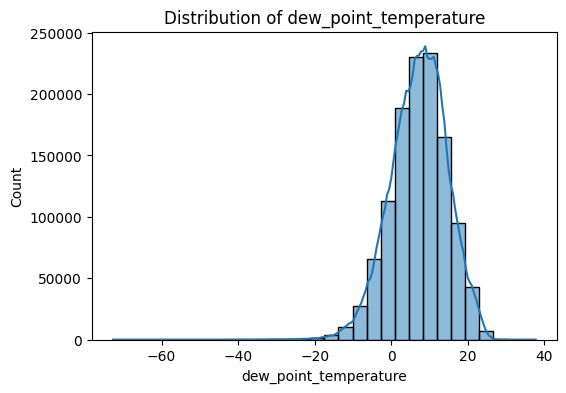

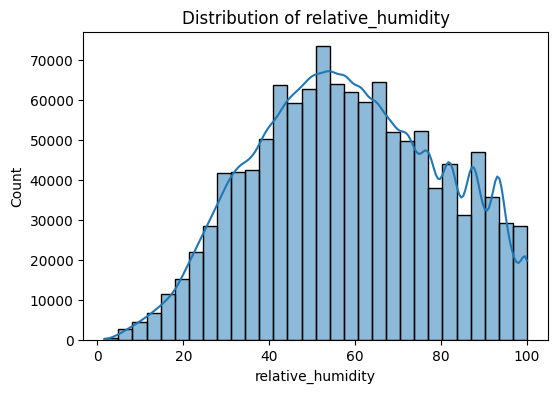

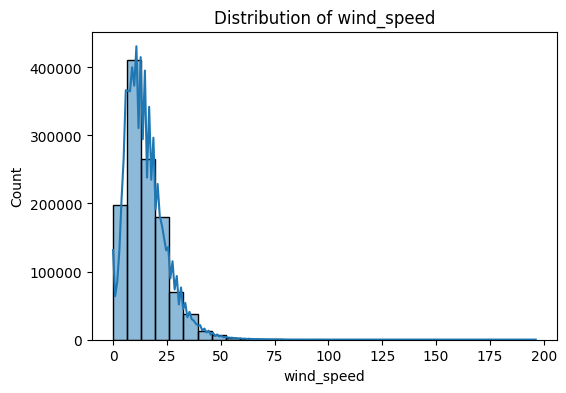

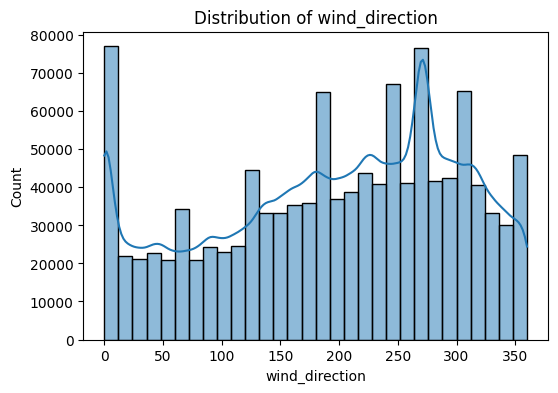

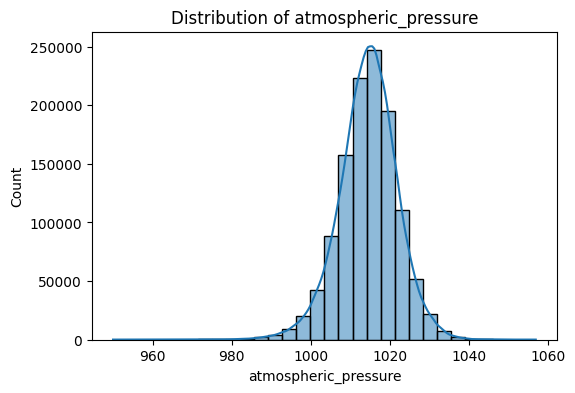

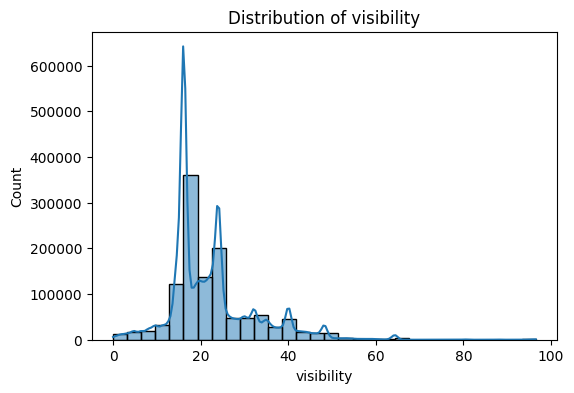

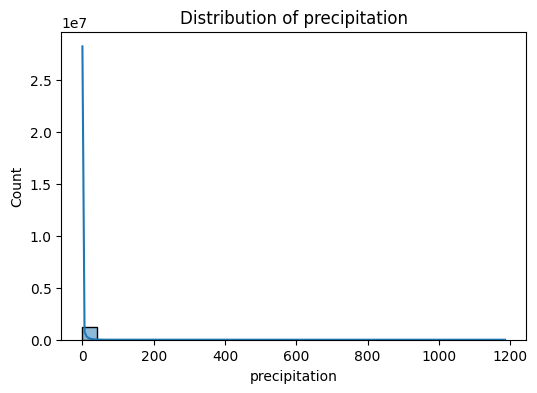

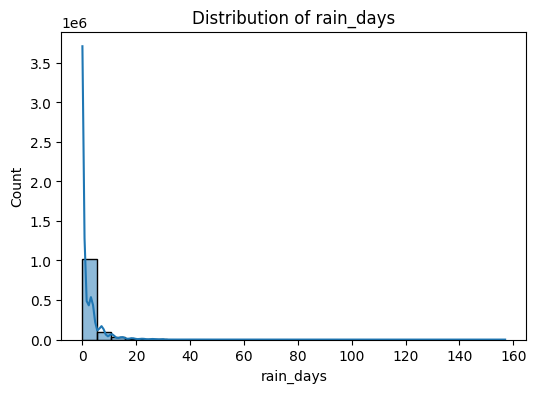

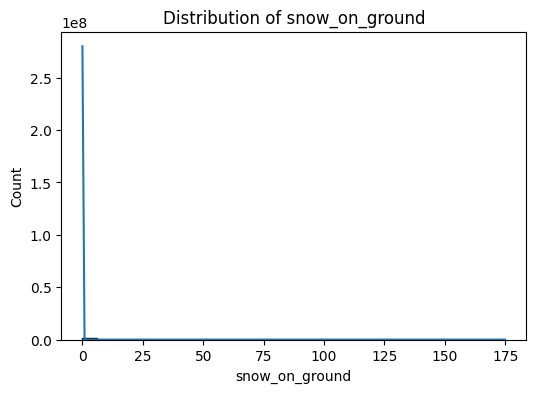

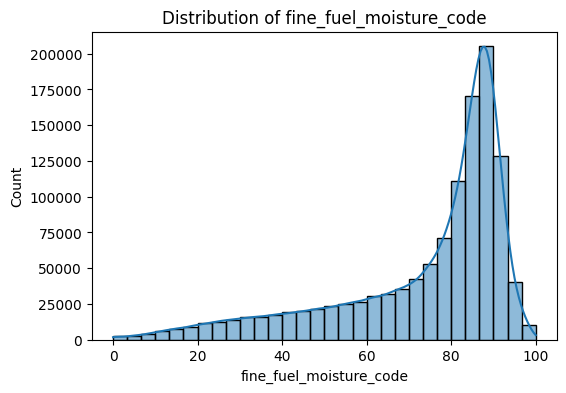

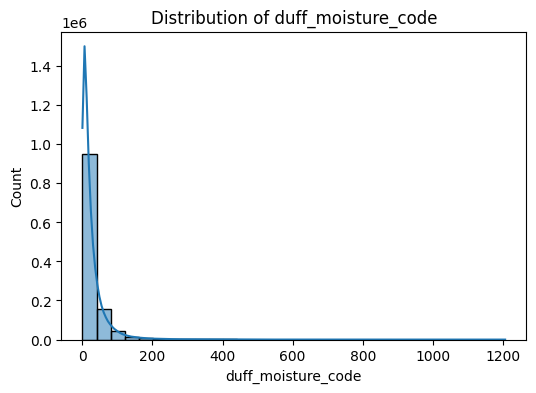

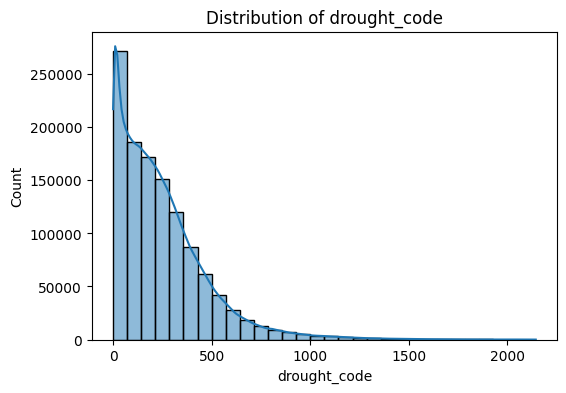

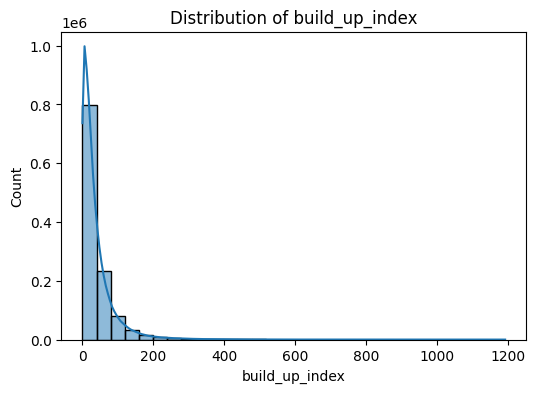

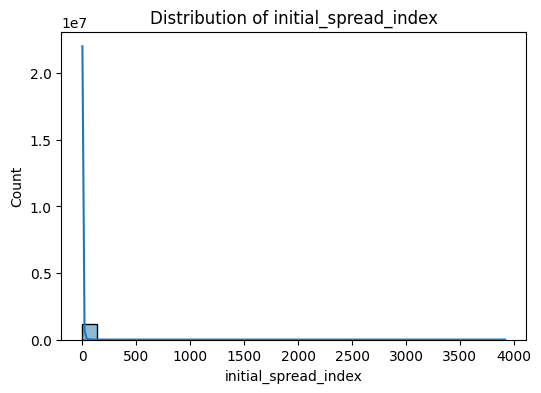

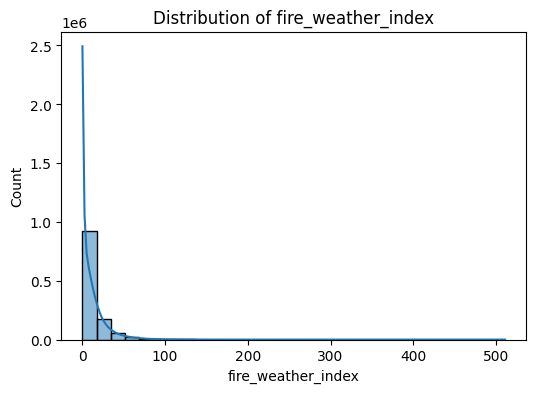

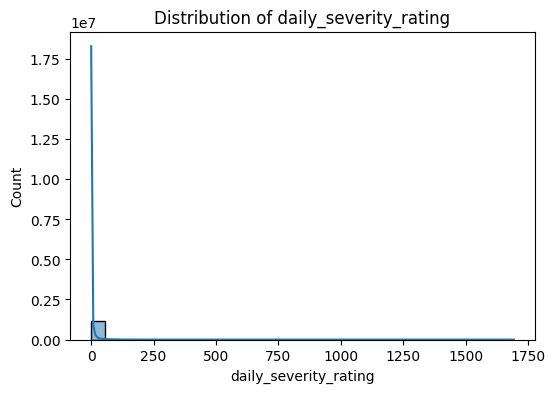

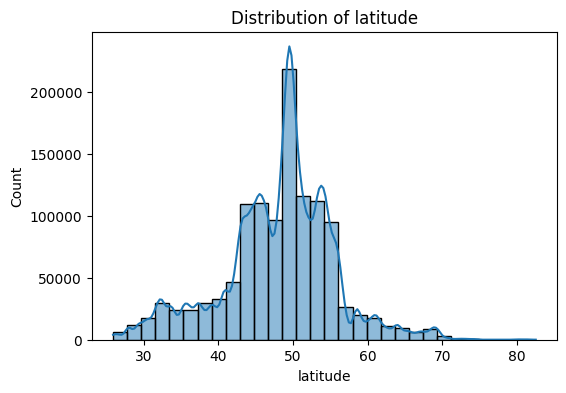

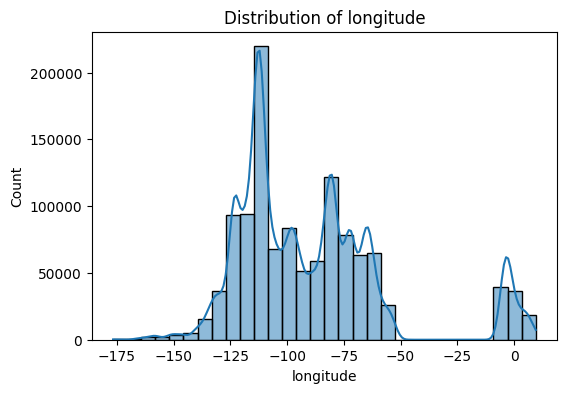

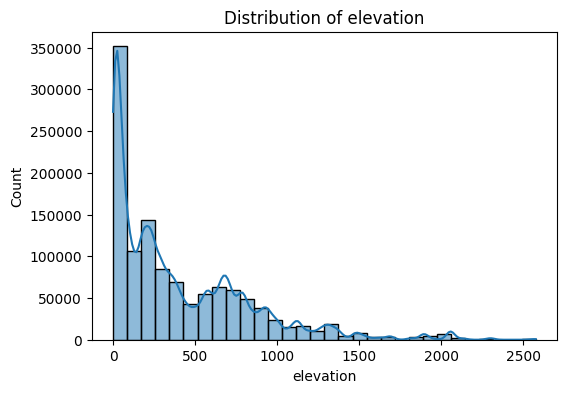

In [13]:
#Univariate Analysis

for col in data.select_dtypes(include=['float64','int64']).columns:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


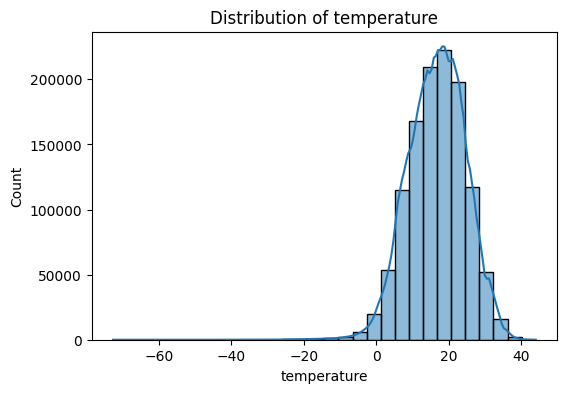

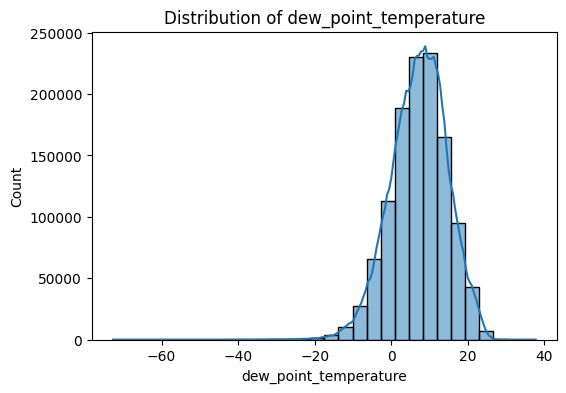

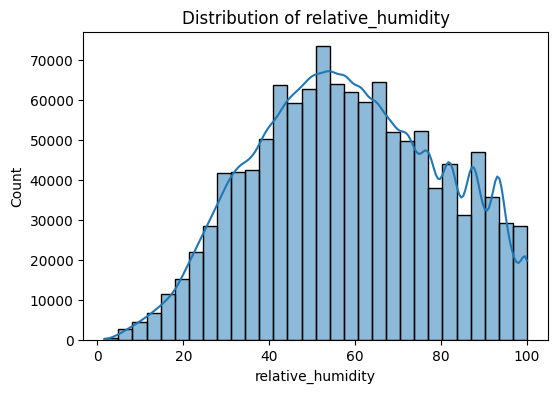

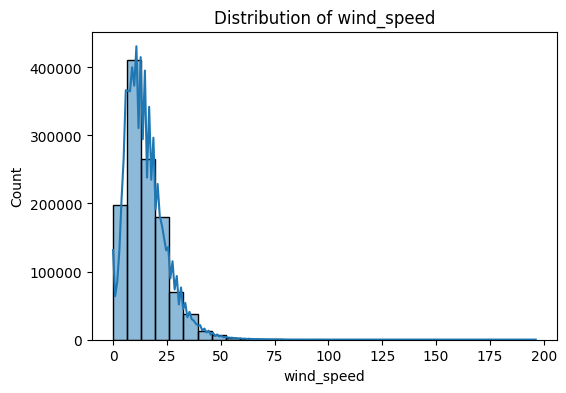

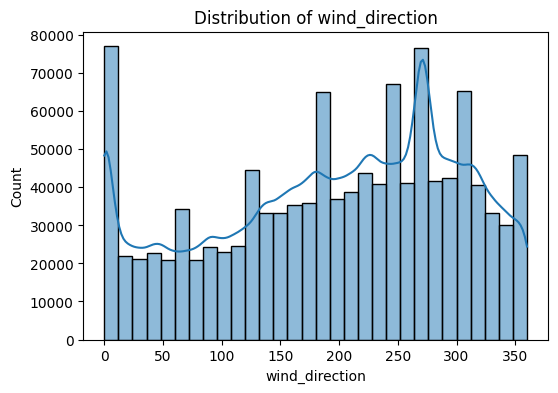

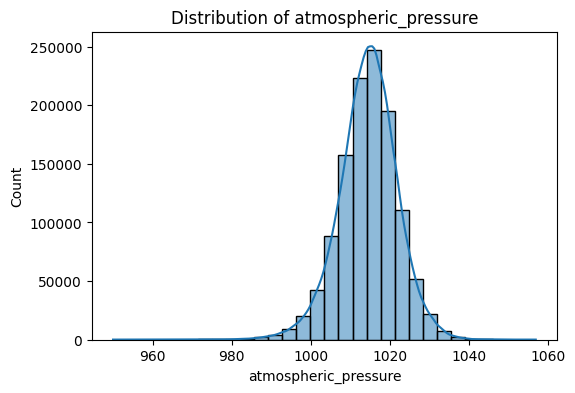

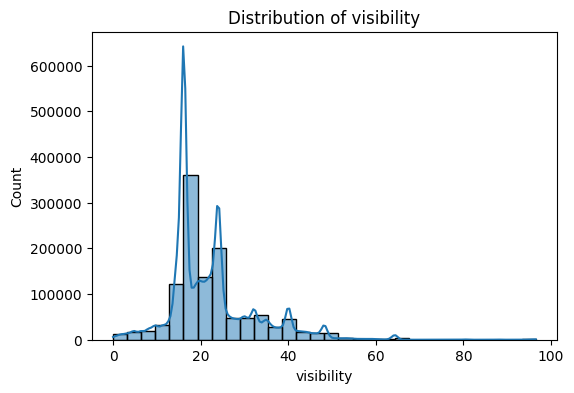

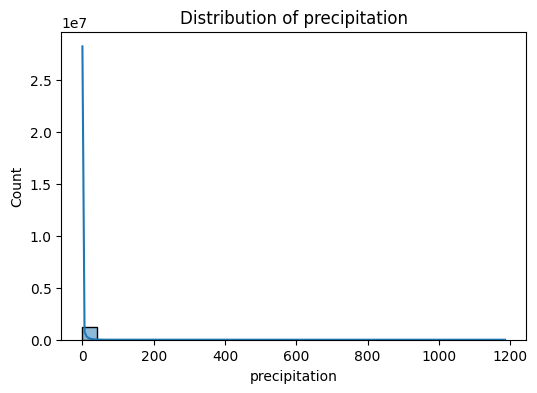

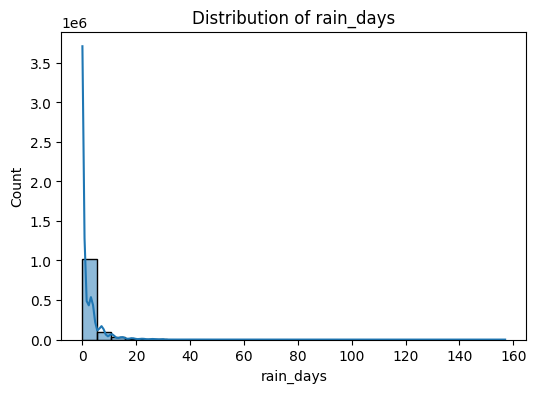

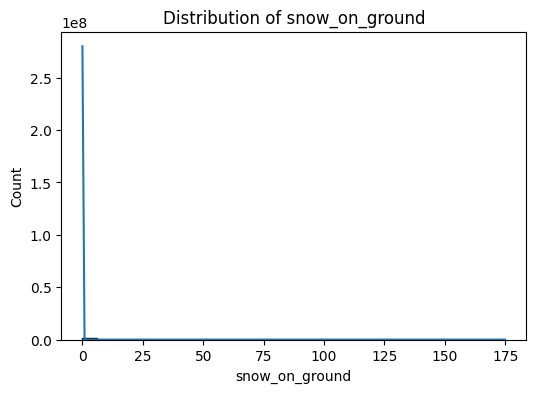

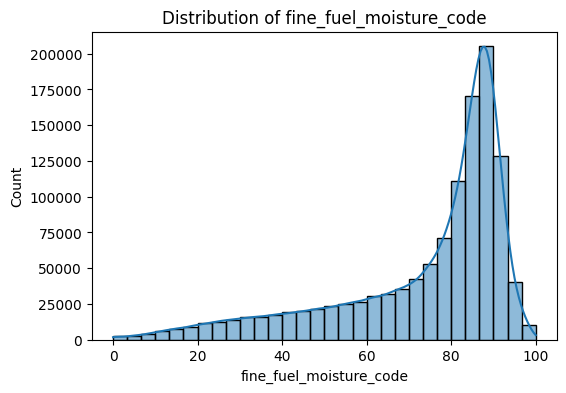

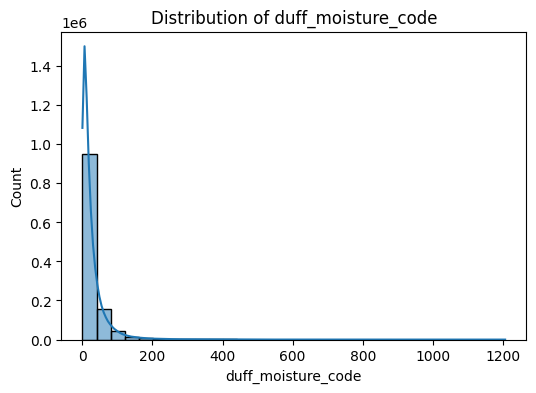

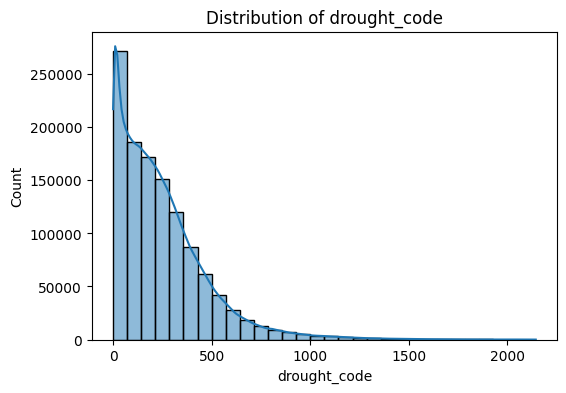

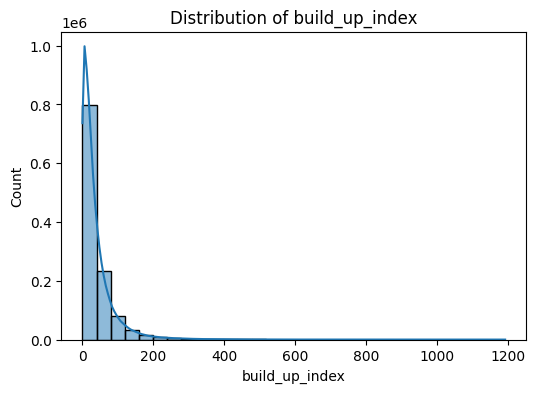

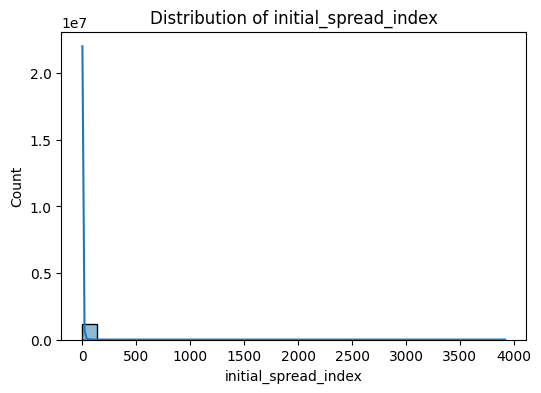

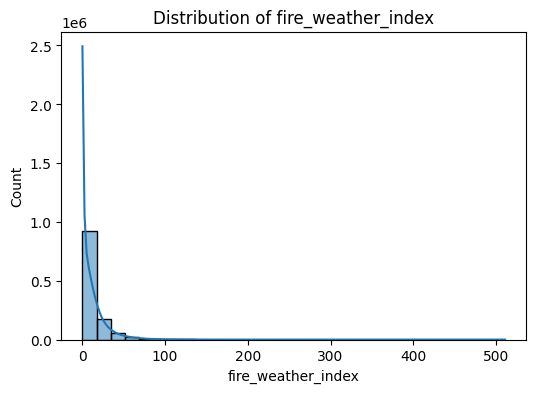

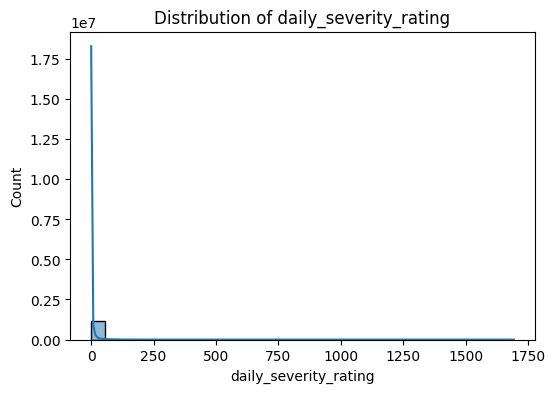

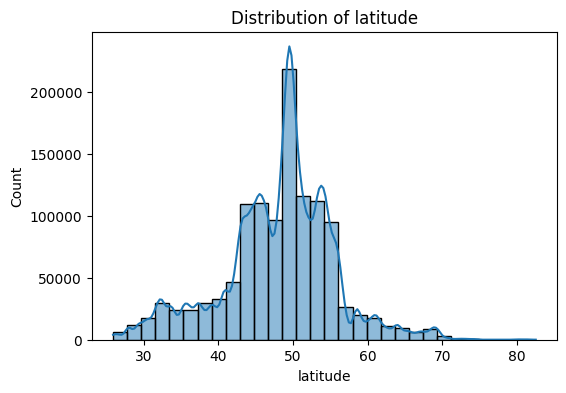

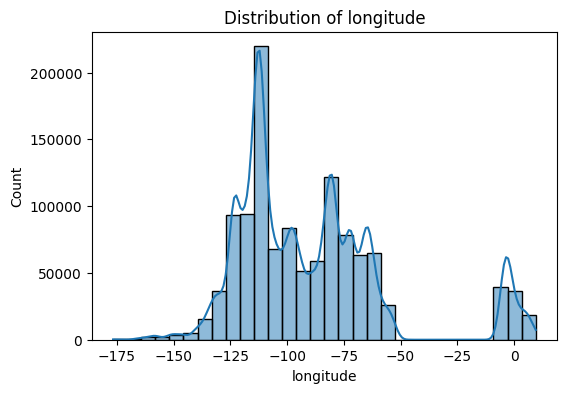

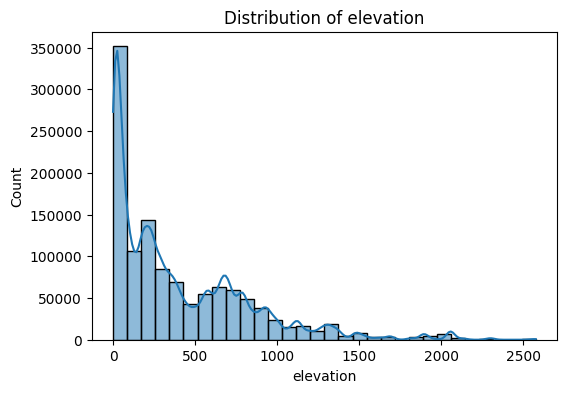

In [14]:
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.savefig(f'distribution_{col}.png', bbox_inches='tight')
    plt.show()
    plt.close()

Optimal Box-Cox lambda: 0.45743938972558984


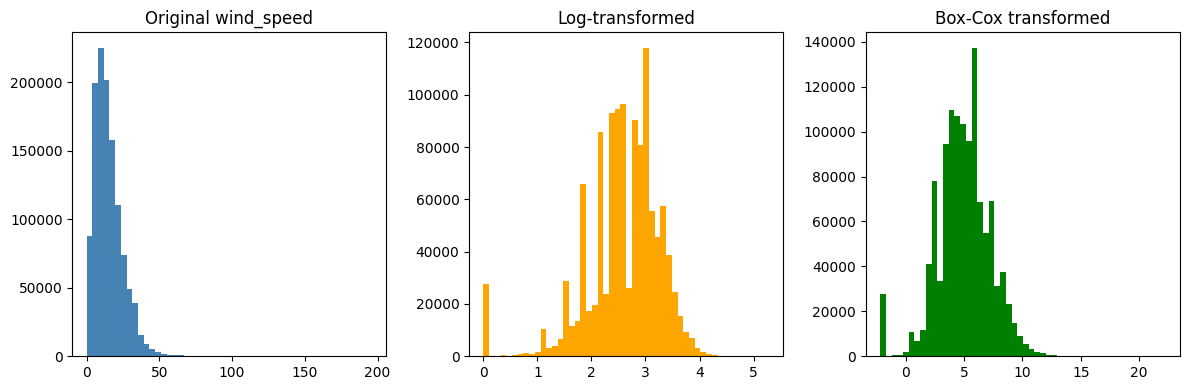

In [15]:
from scipy.stats import boxcox
import numpy as np
import matplotlib.pyplot as plt

wind_speed_log = np.log1p(data['wind_speed'])

# --- Box-Cox Transformation ---
wind_speed_positive = data['wind_speed'].copy()
if (data['wind_speed'] <= 0).any():
    wind_speed_positive += 1e-6

wind_speed_boxcox, fitted_lambda = boxcox(wind_speed_positive)

print(f"Optimal Box-Cox lambda: {fitted_lambda}")

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(data['wind_speed'], bins=50, color='steelblue')
plt.title('Original wind_speed')

plt.subplot(1, 3, 2)
plt.hist(wind_speed_log, bins=50, color='orange')
plt.title('Log-transformed')

plt.subplot(1, 3, 3)
plt.hist(wind_speed_boxcox, bins=50, color='green')
plt.title('Box-Cox transformed')

plt.tight_layout()
plt.savefig('distribution_wind_speed.png', bbox_inches='tight')
plt.show()


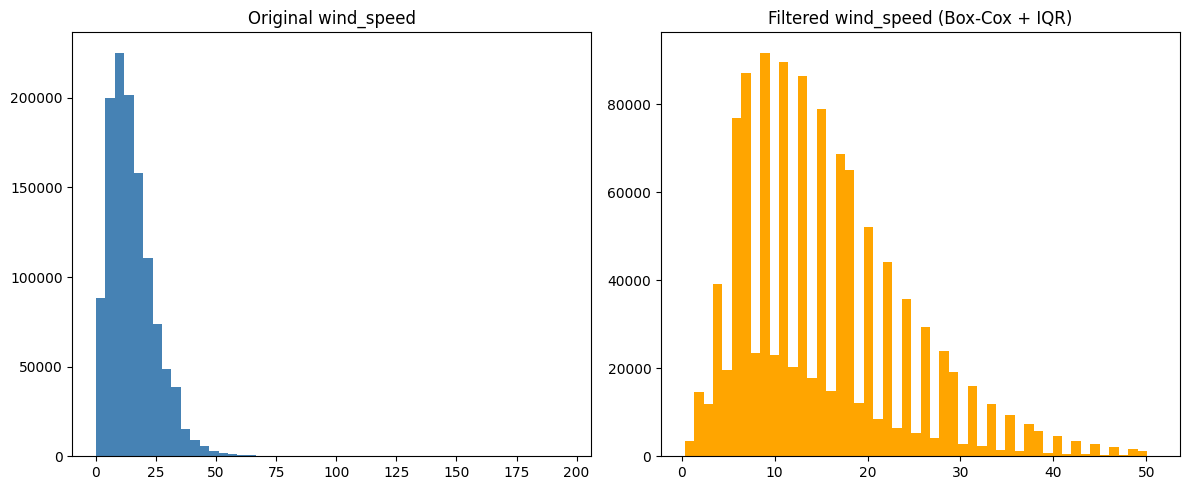

In [16]:
# Prepare data for Box-Cox
wind_speed_positive = data['wind_speed'].copy()
if (wind_speed_positive <= 0).any():
    wind_speed_positive += 1e-6

# Box-Cox transform
wind_speed_boxcox, lambda_bc = boxcox(wind_speed_positive)

# Calculate IQR fences in Box-Cox space
Q1 = np.percentile(wind_speed_boxcox, 25)
Q3 = np.percentile(wind_speed_boxcox, 75)
IQR = Q3 - Q1
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# Mask for non-outliers
mask = (wind_speed_boxcox >= lower_fence) & (wind_speed_boxcox <= upper_fence)

# Filter data
data_filtered = data.loc[mask].copy()

# Plot before and after filtering
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(data['wind_speed'], bins=50, color='steelblue')
plt.title('Original wind_speed')

plt.subplot(1, 2, 2)
plt.hist(data_filtered['wind_speed'], bins=50, color='orange')
plt.title('Filtered wind_speed (Box-Cox + IQR)')

plt.tight_layout()
plt.show()


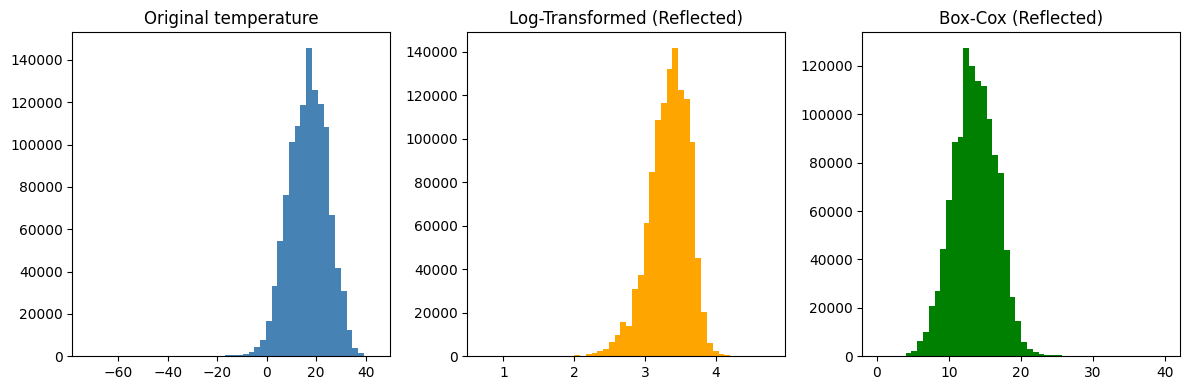

In [17]:
# Assume data['temperature'] contains your temperature values
temp = data['temperature']

# Step 1: Reflect
c = temp.max() + 1
temp_reflected = c - temp

# Step 2: Apply Box-Cox (shift if zeros)
if (temp_reflected <= 0).any():
    temp_reflected += 1e-6
temp_boxcox, fitted_lambda = boxcox(temp_reflected)

# Step 3 (Optional): For log transform
temp_log = np.log1p(temp_reflected)

# Plot to check the result
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.hist(temp, bins=50, color='steelblue')
plt.title('Original temperature')
plt.subplot(1, 3, 2)
plt.hist(temp_log, bins=50, color='orange')
plt.title('Log-Transformed (Reflected)')
plt.subplot(1, 3, 3)
plt.hist(temp_boxcox, bins=50, color='green')
plt.title('Box-Cox (Reflected)')
plt.tight_layout()
plt.show()

Optimal Box-Cox lambda: 0.1461795049974948


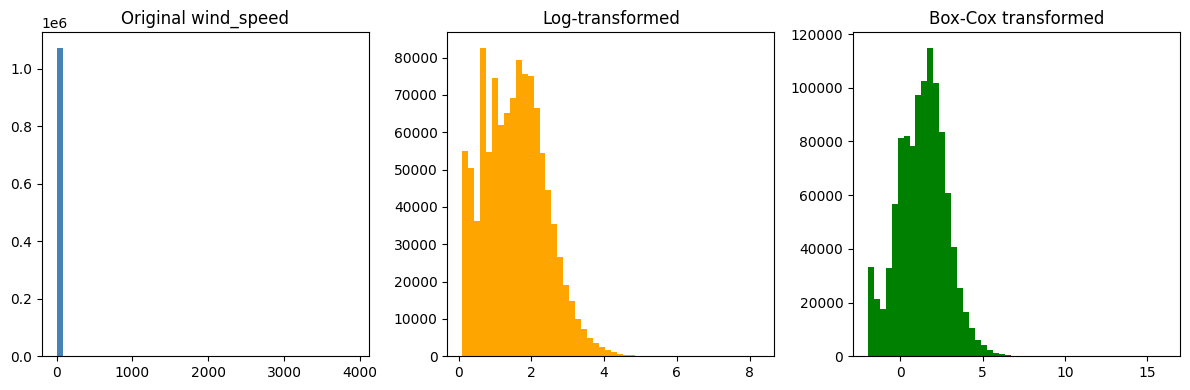

In [18]:
nonzero =  data['initial_spread_index'][data['initial_spread_index'] > 0]
log_transformed = np.log1p(nonzero)
boxcox_transformed, fitted_lambda = boxcox(nonzero)

print(f"Optimal Box-Cox lambda: {fitted_lambda}")

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(nonzero, bins=50, color='steelblue')
plt.title('Original wind_speed')

plt.subplot(1, 3, 2)
plt.hist(log_transformed, bins=50, color='orange')
plt.title('Log-transformed')

plt.subplot(1, 3, 3)
plt.hist(boxcox_transformed, bins=50, color='green')
plt.title('Box-Cox transformed')

plt.tight_layout()
#plt.savefig('distribution_wind_speed.png', bbox_inches='tight')
plt.show()


In [19]:
def remove_outliers_boxcox(series):
    s = series.copy()
    if (s <= 0).any():
        s = s + 1e-6
    s_boxcox, _ = boxcox(s)
    Q1 = np.percentile(s_boxcox, 25)
    Q3 = np.percentile(s_boxcox, 75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    mask = (s_boxcox >= lower) & (s_boxcox <= upper)
    print(f"{series.name}: Box-Cox outlier removal retained {mask.sum()} of {len(series)} values")
    return mask


In [20]:
def remove_outliers_no_transform(series):
    s = series.copy()
    Q1 = np.percentile(s, 25)
    Q3 = np.percentile(s, 75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    mask = (s >= lower) & (s <= upper)
    print(f"{series.name}: No-transform outlier removal retained {mask.sum()} of {len(series)} values")
    return mask


In [21]:
def remove_outliers_zero_inflated(series):
    # Mask array initialized as False for all values
    mask = pd.Series(False, index=series.index)
    
    # Zero mask (keep zeros as is)
    zeros_mask = (series == 0)
    
    # Non-zero values
    nonzero = series[~zeros_mask]
    
    if len(nonzero) > 0:
        # Apply Box-Cox IQR outlier removal on non-zero values
        nonzero_mask = remove_outliers_boxcox(nonzero)
        
        # Update mask for non-zero entries with outlier filtering
        mask.loc[nonzero.index] = nonzero_mask
        
    # Combine zeros with filtered non-zeros
    combined_mask = zeros_mask | mask
    
    print(f"{series.name}: Zero-inflated outlier removal retained {combined_mask.sum()} of {len(series)} values (includes zeros)")
    return combined_mask


In [23]:

# Specify columns
boxcox_cols = ['wind_speed',
               'fine_fuel_moisture_code', 
               'drought_code',
               'duff_moisture_code',
               'build_up_index',
               'fire_weather_index'
              ]

no_transform_cols = ['relative_humidity', 
                     'temperature',
                     'dew_point_temperature',
                     'atmospheric_pressure',
                    ]

zero_based_cols = ['precipitation',
                   #'rain_days',
                   'initial_spread_index',
                   'snow_on_ground',
                   'fire_weather_index',
                  ]

In [24]:
# Initialize combined mask as all True to start
combined_mask = pd.Series(True, index=data.index)

# Apply outlier removal on boxcox columns
for col in boxcox_cols:
    mask_col = remove_outliers_boxcox(data[col])
    #print(f"{col} mask type: {type(mask_col)}, mask index equals data index? {mask_col.index.equals(data.index)}")
    combined_mask = combined_mask & mask_col

# Apply on no-transform columns
for col in no_transform_cols:
    mask_col = remove_outliers_no_transform(data[col])
    #print(f"{col} mask type: {type(mask_col)}, mask index equals data index? {mask_col.index.equals(data.index)}")
    combined_mask = combined_mask & mask_col

# Apply zero-inflation aware outlier removal on zero-based columns
for col in zero_based_cols:
    mask_col = remove_outliers_zero_inflated(data[col])
    combined_mask = combined_mask & mask_col

# Filter dataset after all outlier removals
filtered_data = data.loc[combined_mask].copy()

print(f"Rows before filtering: {len(data)}")
print(f"Rows after filtering outliers across all columns: {len(filtered_data)}")

wind_speed: Box-Cox outlier removal retained 1150557 of 1183940 values
fine_fuel_moisture_code: Box-Cox outlier removal retained 1183940 of 1183940 values
drought_code: Box-Cox outlier removal retained 1180085 of 1183940 values
duff_moisture_code: Box-Cox outlier removal retained 1151353 of 1183940 values
build_up_index: Box-Cox outlier removal retained 1155946 of 1183940 values
fire_weather_index: Box-Cox outlier removal retained 1183837 of 1183940 values
relative_humidity: No-transform outlier removal retained 1183940 of 1183940 values
temperature: No-transform outlier removal retained 1177722 of 1183940 values
dew_point_temperature: No-transform outlier removal retained 1175007 of 1183940 values
atmospheric_pressure: No-transform outlier removal retained 1160144 of 1183940 values
precipitation: Box-Cox outlier removal retained 551390 of 551691 values
precipitation: Zero-inflated outlier removal retained 1183639 of 1183940 values (includes zeros)
initial_spread_index: Box-Cox outlier

In [25]:
filtered_data

,temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction,atmospheric_pressure,visibility,precipitation,rain_days,snow_on_ground,...,duff_moisture_code,drought_code,build_up_index,initial_spread_index,fire_weather_index,daily_severity_rating,country,latitude,longitude,elevation
0,5.7,-6.0,42.0,5.0,135,1009.13,39.3,0.00,1,0.0,...,6.5,309.9,12.3,0.7,0.5,0.0,United Kingdom,55.440834,-5.696944,12.8
1,15.2,10.1,71.0,5.6,170,1018.60,30.1,0.00,5,0.0,...,31.9,172.7,43.7,2.8,7.6,1.0,Canada,48.460000,-123.300000,60.1
2,5.9,4.2,88.0,27.9,321,1009.76,11.2,7.10,0,0.0,...,14.5,400.1,26.5,0.2,0.2,0.0,Canada,53.460000,-111.260000,656.0
3,20.6,15.4,71.0,19.8,197,1015.41,21.1,0.00,1,0.0,...,6.1,242.0,11.4,1.6,1.2,0.0,Canada,53.350000,-110.420000,664.0
4,11.0,6.0,71.5,13.0,260,1005.90,16.1,0.25,0,0.0,...,4.4,12.2,4.6,1.4,0.6,0.0,United States,43.645645,-70.308620,23.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183935,11.5,4.5,62.0,12.6,292,1015.70,17.9,0.20,0,0.0,...,1.9,138.9,3.7,1.8,0.7,0.0,Canada,51.870000,-63.280000,588.9
1183936,17.9,5.9,45.5,7.4,220,1012.10,24.0,0.00,2,0.0,...,5.8,42.5,8.7,3.1,2.9,0.2,Canada,49.910000,-99.951940,409.4
1183937,18.4,9.0,54.5,14.8,300,1017.10,19.8,0.00,1,0.0,...,20.5,130.0,29.4,5.1,10.1,1.6,Canada,51.770000,-104.200000,560.1
1183938,11.0,-1.0,43.6,29.6,260,1015.10,14.5,0.00,4,0.0,...,8.6,253.4,15.9,11.8,14.4,3.0,Canada,49.520557,-113.997220,1189.6


In [29]:
filtered_data_NN = filtered_data
filtered_data_NN.to_csv("filtered_dataa.csv",index=False)

In [28]:
from sklearn.preprocessing import PowerTransformer

# Ensure positive values for Box-Cox, shift if necessary
for col in boxcox_cols:
    min_val = filtered_data[col].min()
    if min_val <= 0:
        shift = abs(min_val) + 1e-6
        filtered_data[col] = filtered_data[col] + shift

# Fit and transform boxcox columns
pt = PowerTransformer(method='box-cox', standardize=False)
filtered_data[boxcox_cols] = pt.fit_transform(filtered_data[boxcox_cols])

# Now 'data' contains all original columns but with boxcox_cols replaced by transformed values
print(filtered_data.head())

   temperature  dew_point_temperature  relative_humidity  wind_speed  \
0          5.7                   -6.0               42.0    2.104744   
1         15.2                   10.1               71.0    2.300776   
2          5.9                    4.2               88.0    6.044373   
3         20.6                   15.4               71.0    5.068362   
4         11.0                    6.0               71.5    4.014202   

   wind_direction  atmospheric_pressure  visibility  precipitation  rain_days  \
0             135               1009.13        39.3           0.00          1   
1             170               1018.60        30.1           0.00          5   
2             321               1009.76        11.2           7.10          0   
3             197               1015.41        21.1           0.00          1   
4             260               1005.90        16.1           0.25          0   

   snow_on_ground  ...  duff_moisture_code  drought_code  build_up_index  \
0   

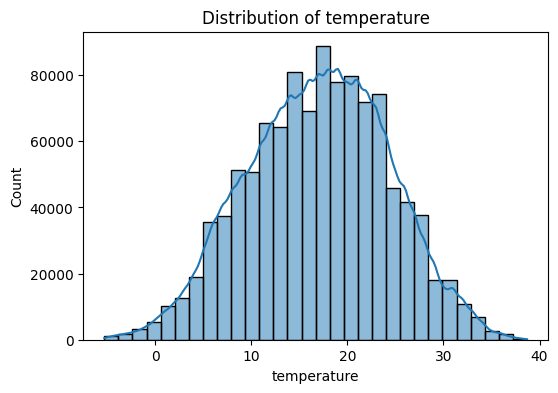

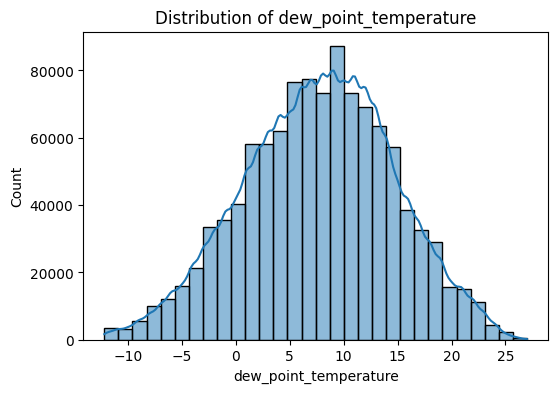

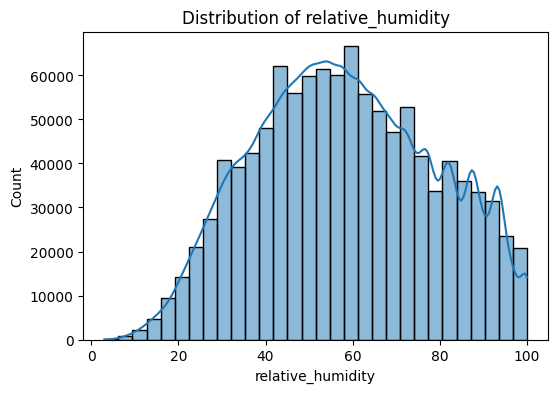

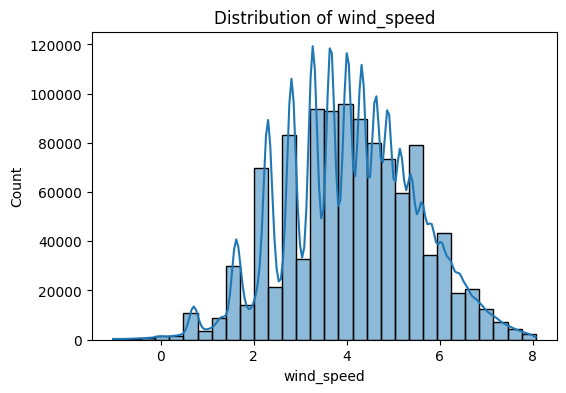

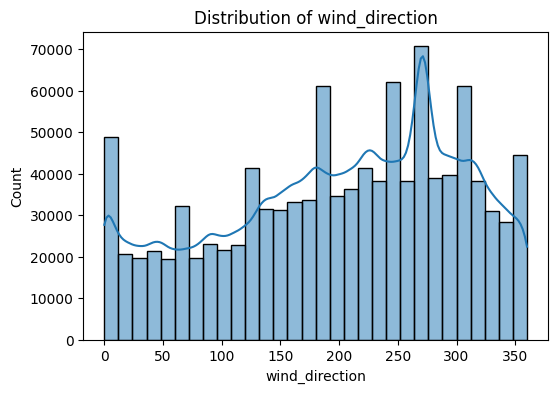

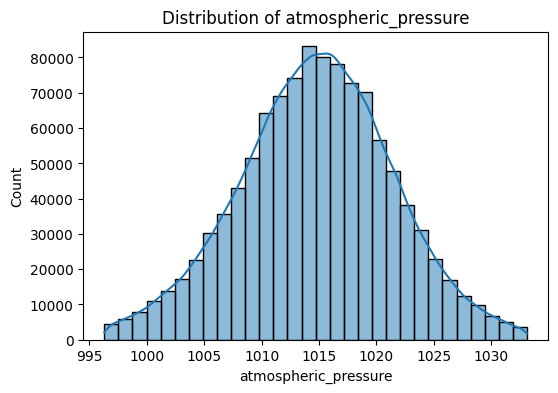

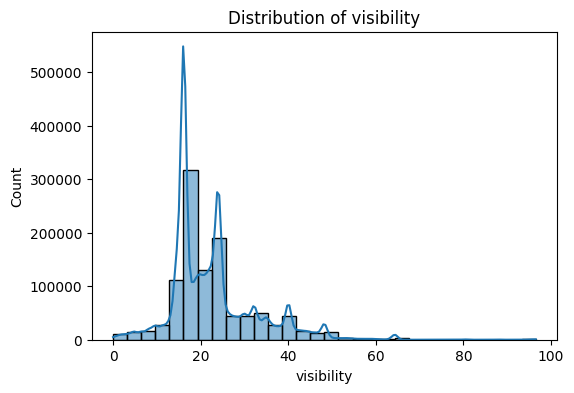

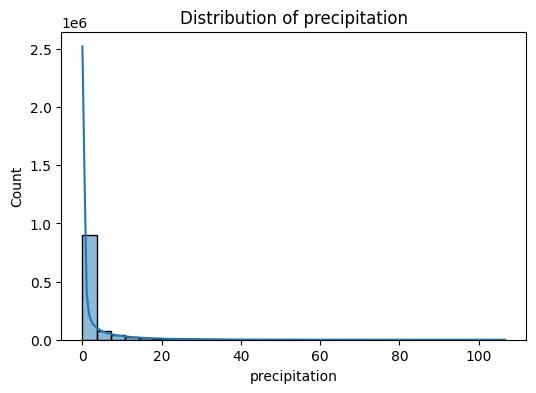

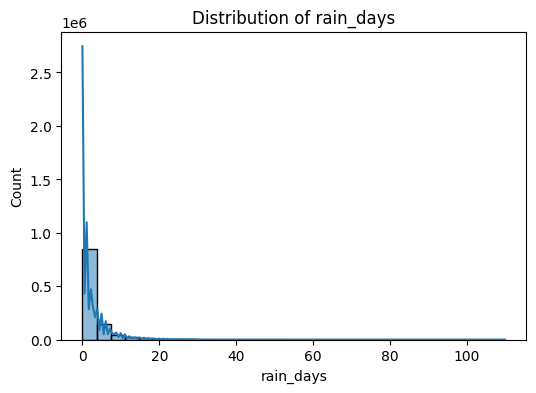

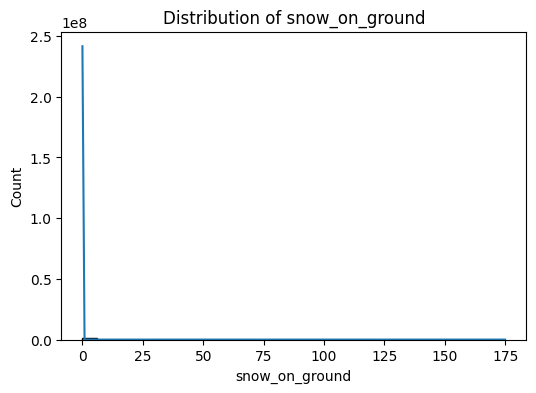

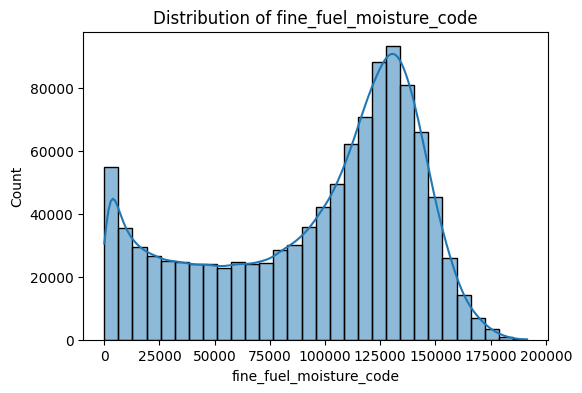

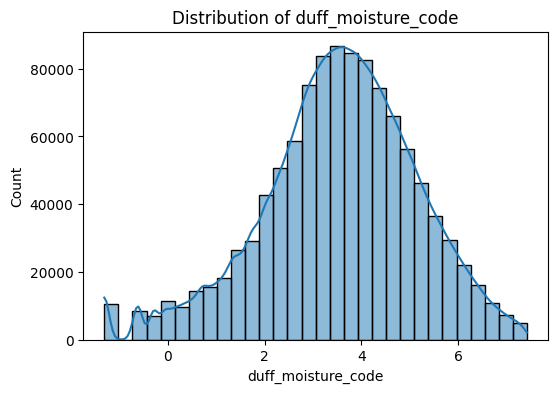

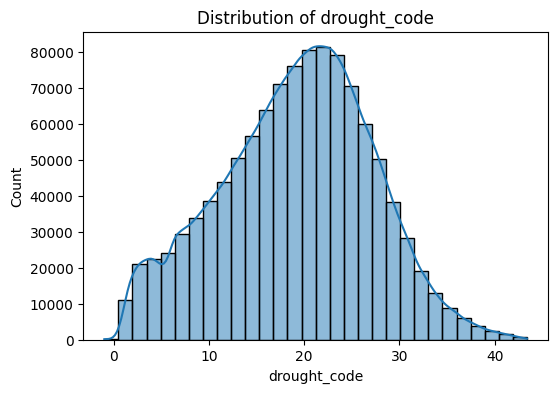

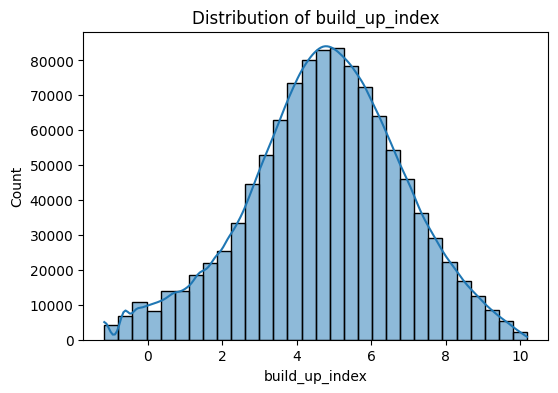

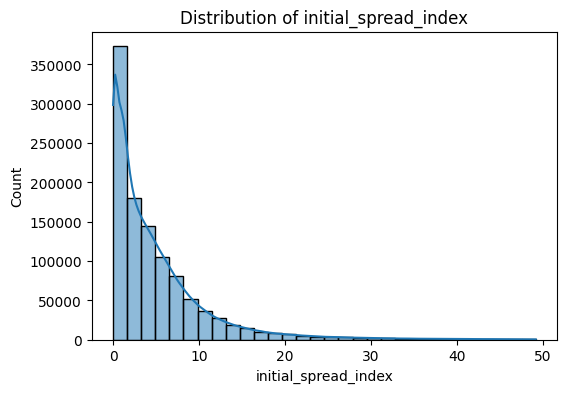

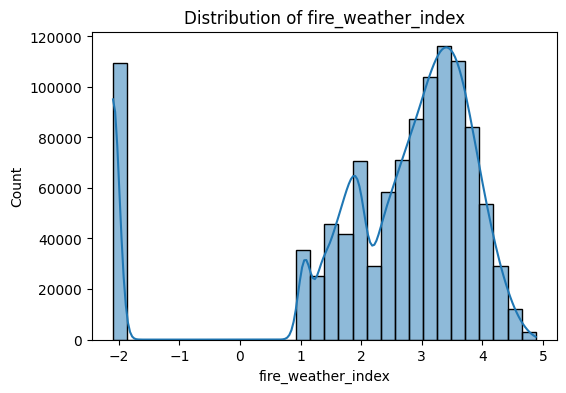

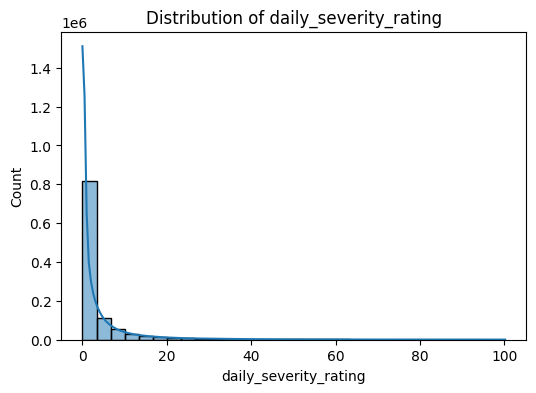

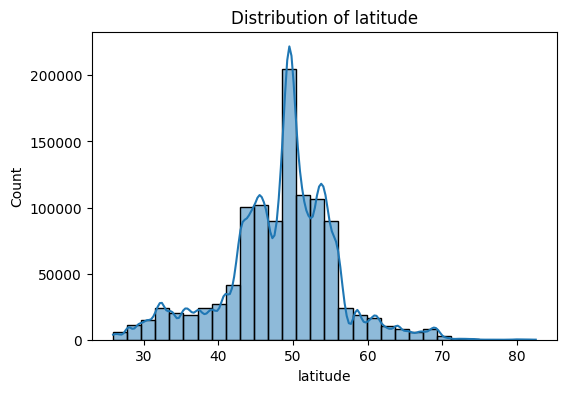

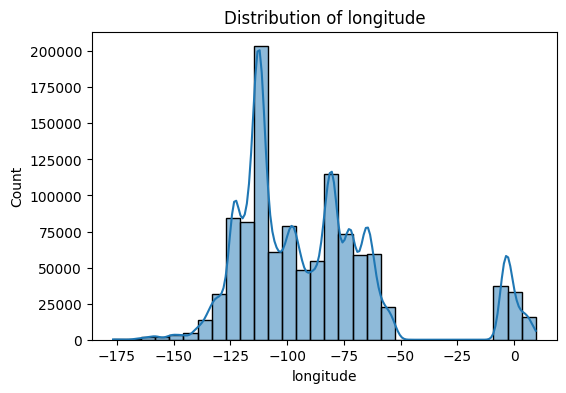

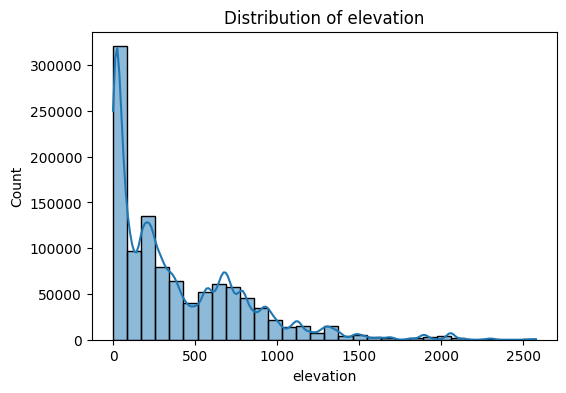

In [30]:
#Univariate Analysis

for col in filtered_data.select_dtypes(include=['float64','int64']).columns:
    plt.figure(figsize=(6,4))
    sns.histplot(filtered_data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


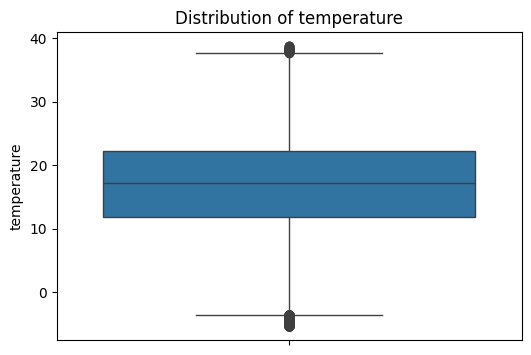

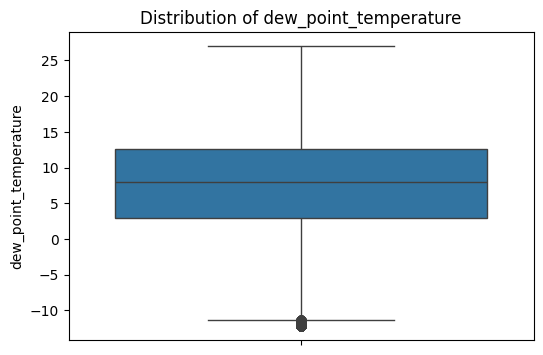

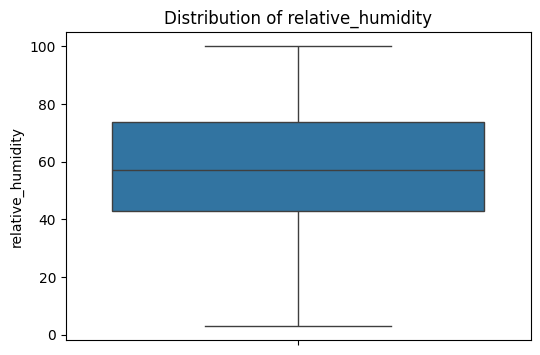

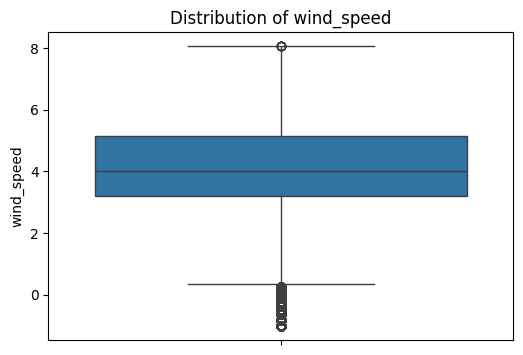

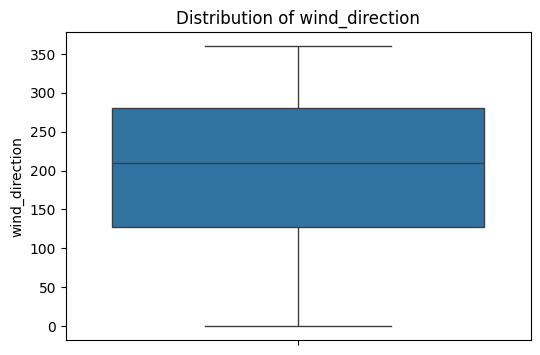

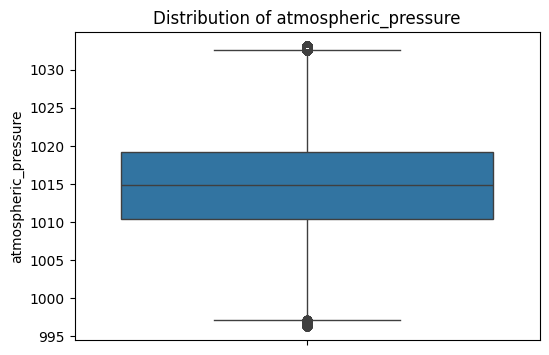

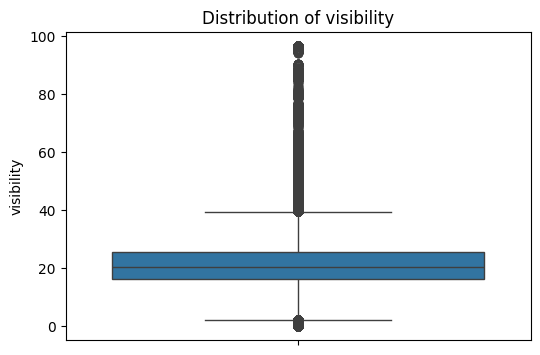

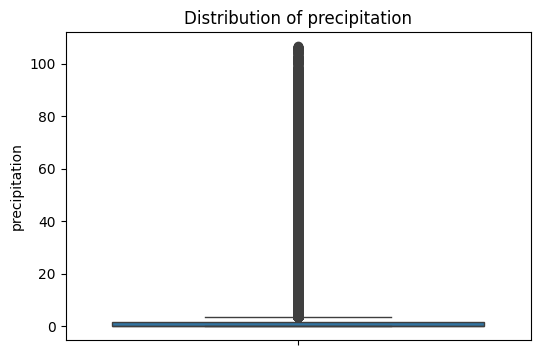

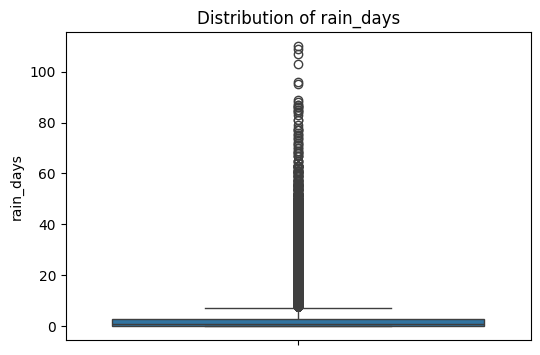

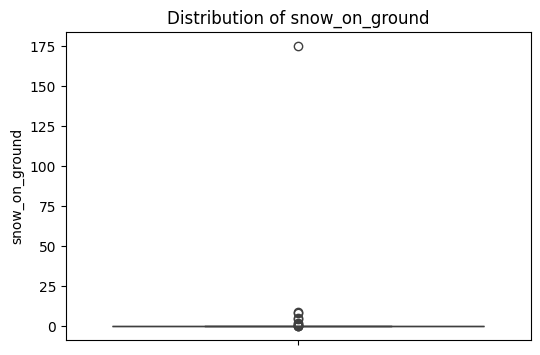

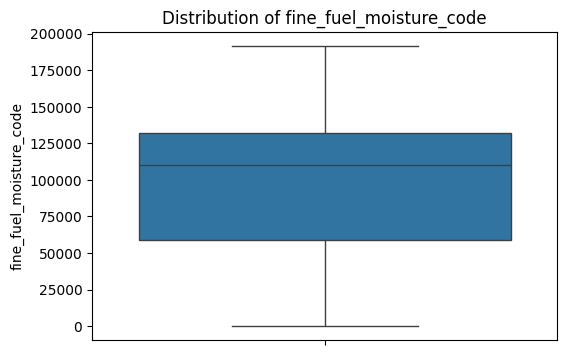

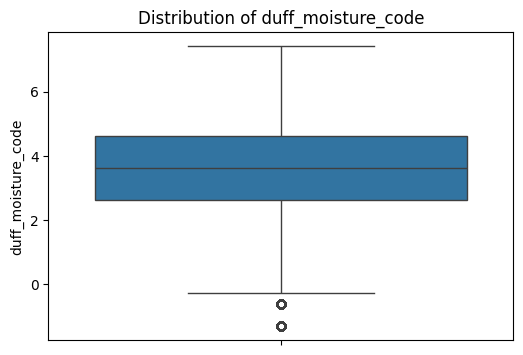

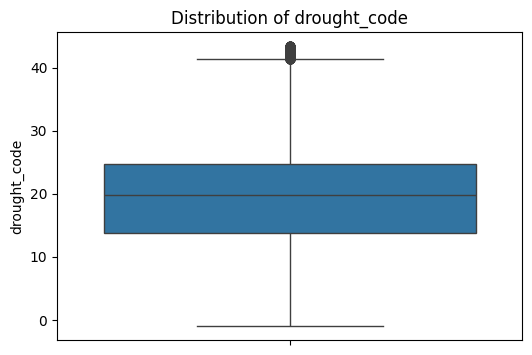

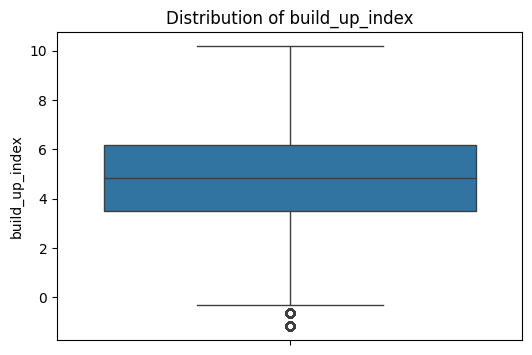

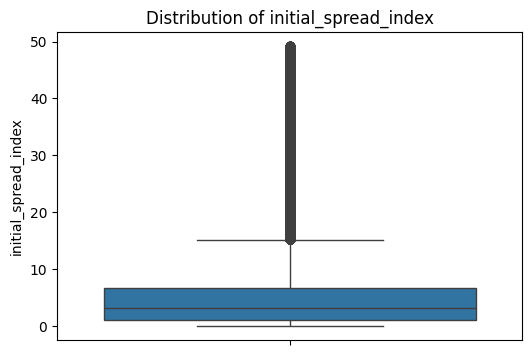

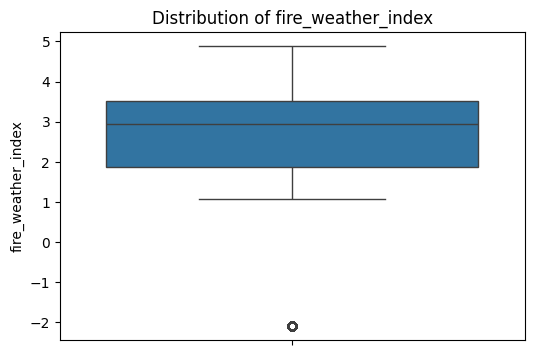

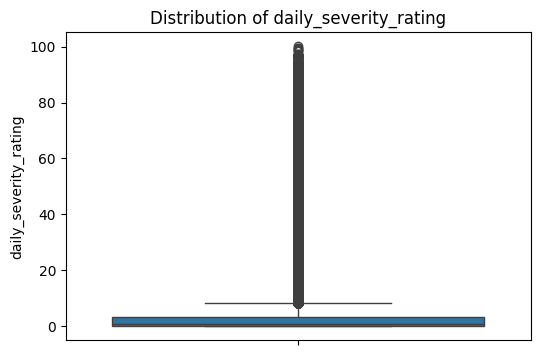

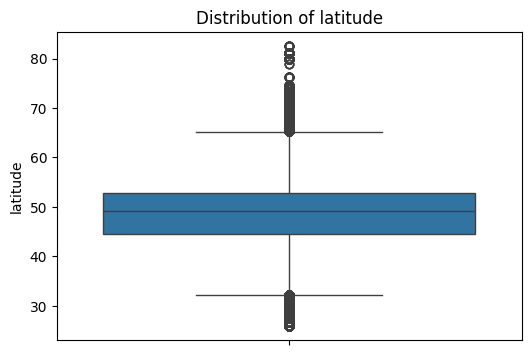

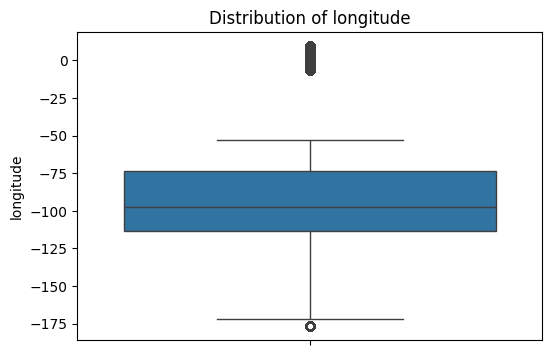

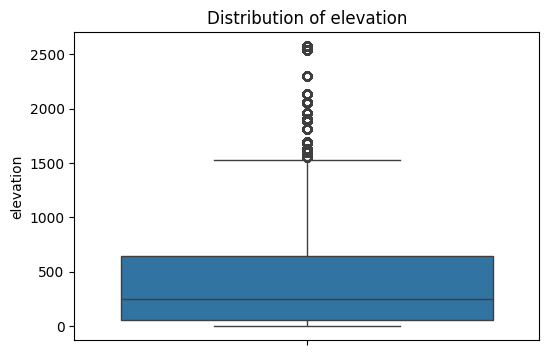

In [31]:
#Univariate Analysis

for col in filtered_data.select_dtypes(include=['float64','int64']).columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(y = filtered_data[col])
    plt.title(f'Distribution of {col}')
    plt.show()


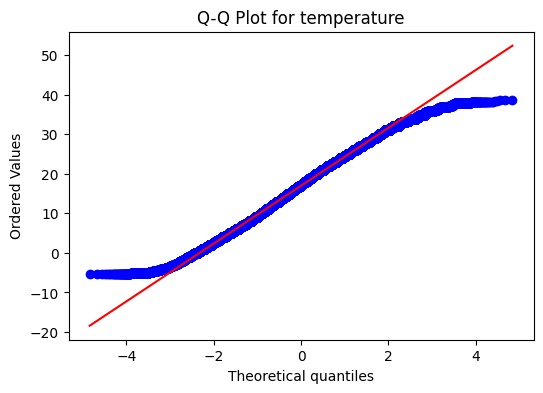

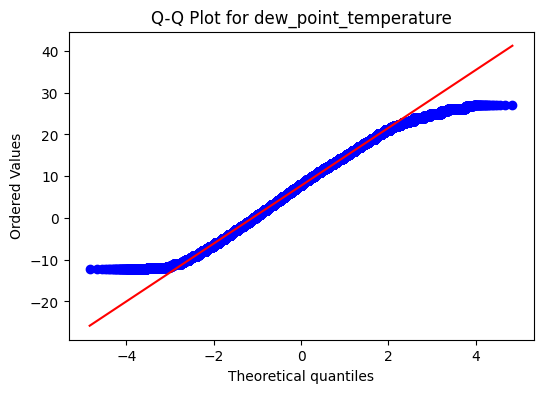

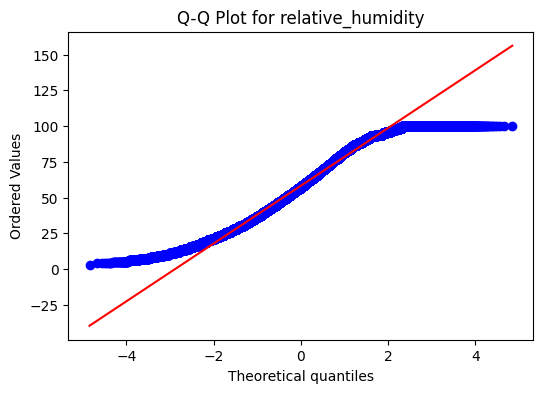

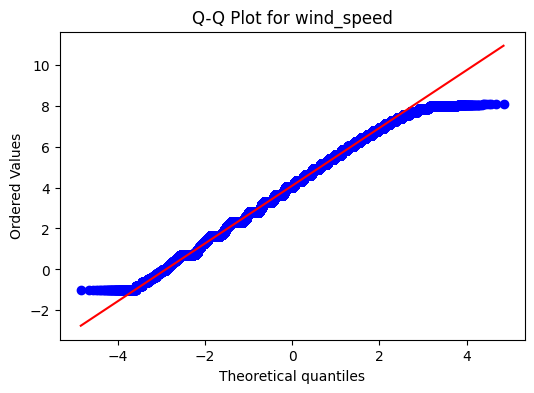

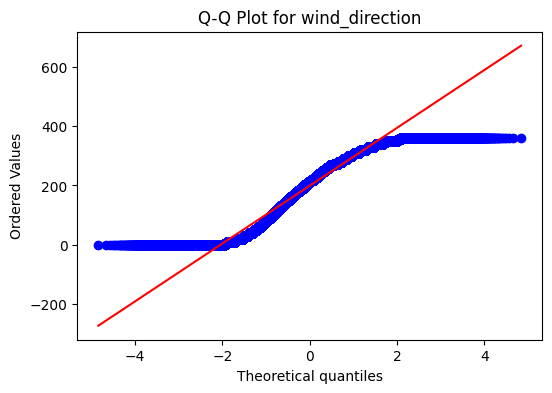

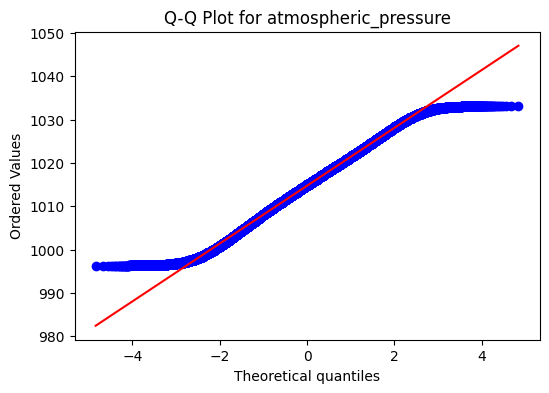

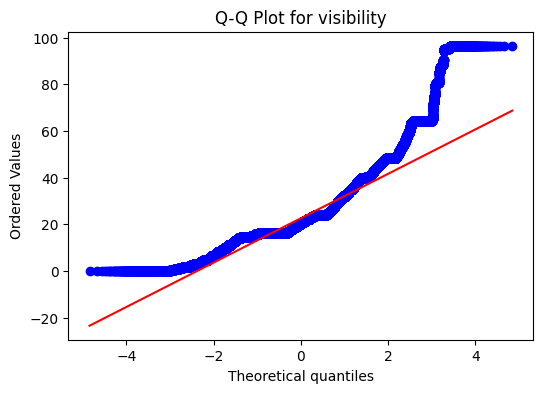

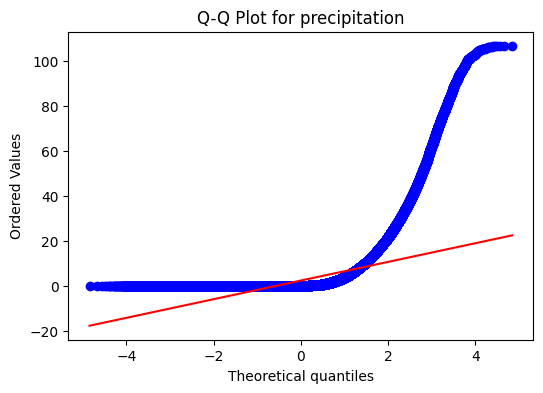

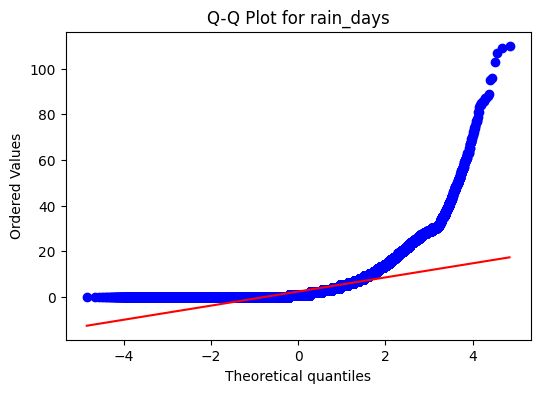

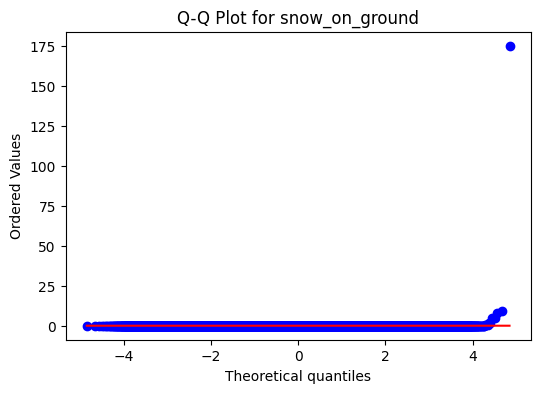

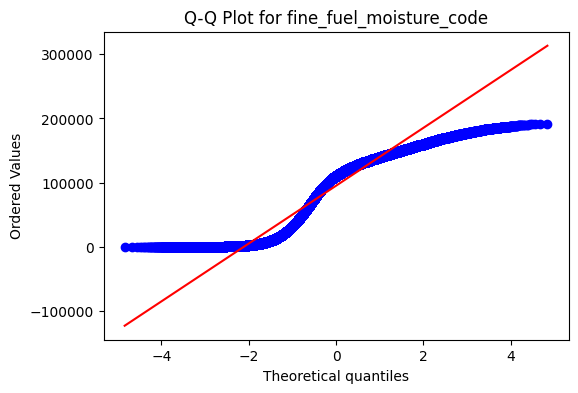

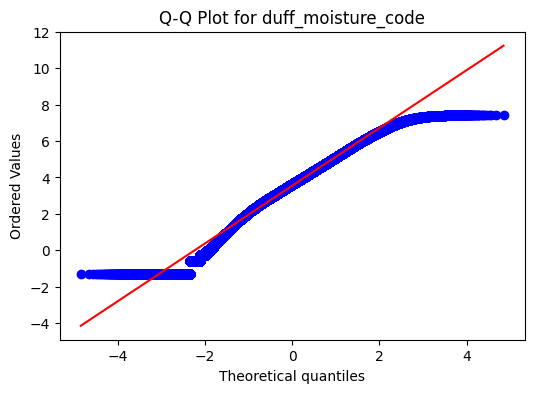

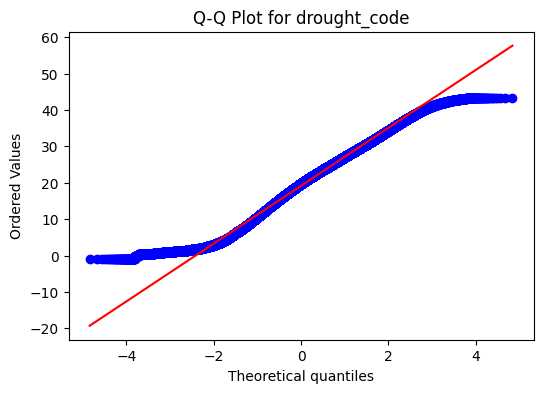

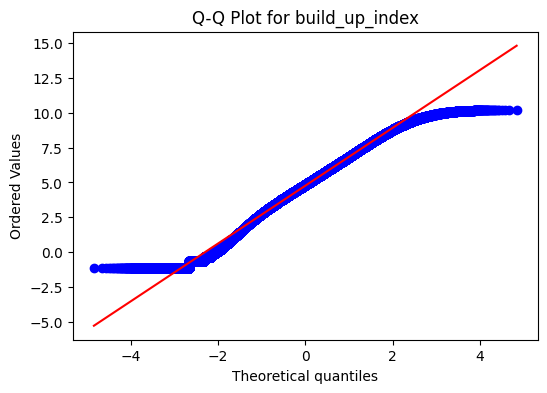

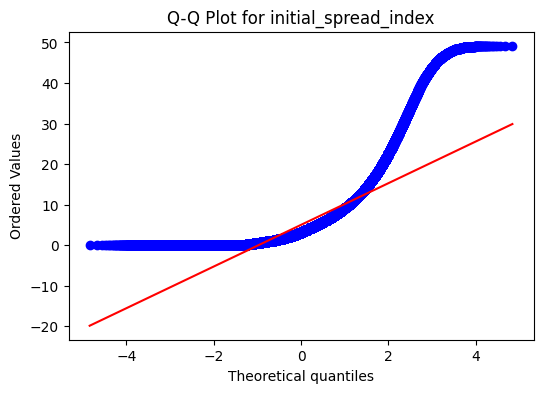

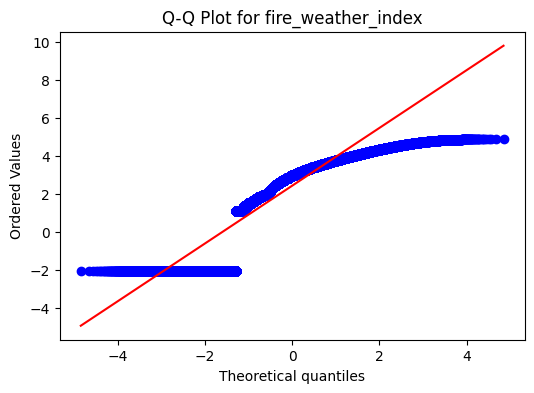

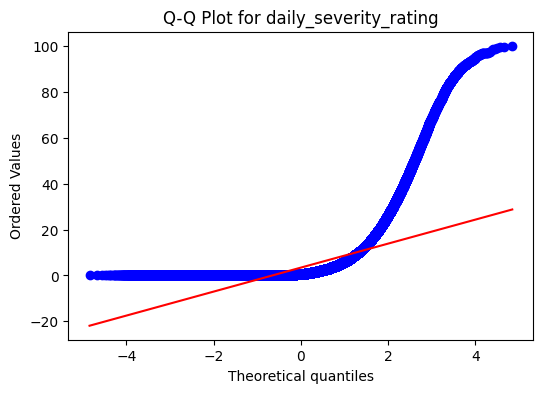

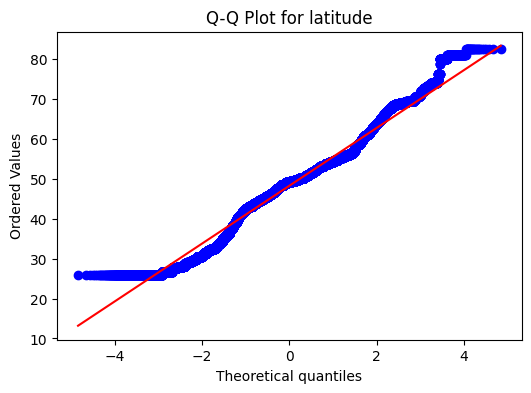

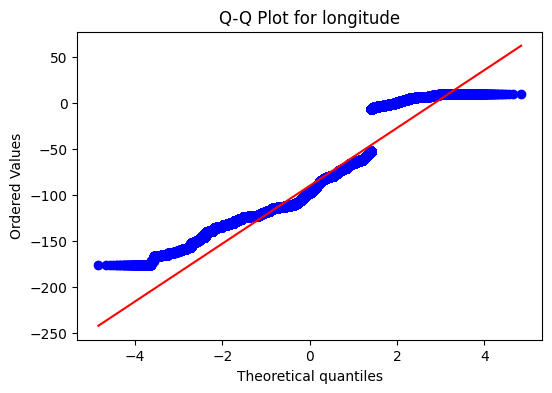

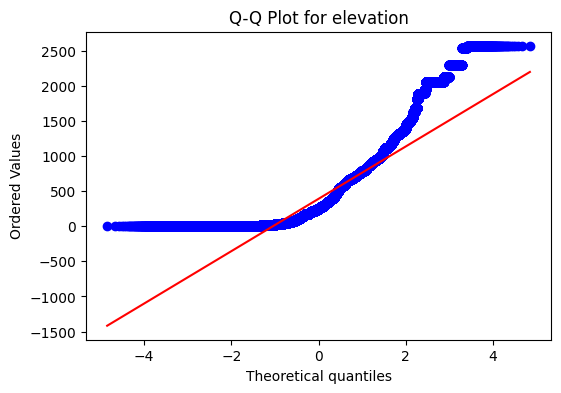

In [33]:
from scipy import stats
# Select numeric columns
numeric_cols = filtered_data.select_dtypes(include='number').columns

# Plot Q-Q plots for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    stats.probplot(filtered_data[col].dropna(), dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {col}")
    plt.show()

In [34]:
filtered_data.to_csv("filtered_dataa1.csv")